## Composition data
- get the composition and band gap data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/Bg_pre2'

In [3]:
data_df = pd.read_csv('./Data/mp_eda_data.csv')

In [36]:
# get the composition and bandgap data
mp_df = data_df

In [37]:
# transform the composition_str column to composition column
from matminer.featurizers.conversions import StrToComposition

stc = StrToComposition(target_col_id='composition_type')
mp_trans_df = stc.featurize_dataframe(mp_df, 'composition')

StrToComposition:   0%|          | 0/10342 [00:00<?, ?it/s]

In [38]:
mp_trans_df.head()

,material_id,composition,nsites,crystal_system,space_group,volume,density,density_atomic,efermi,energy_per_atom,formation_energy_per_atom,is_gap_direct,band_gap,is_oxide,composition_type
0,mp-32800,Ac16 S24,40,1,122,1118.407852,6.535149,27.960196,5.791820,-34.768478,-2.492486,0.0,2.2962,0.0,"(Ac, S)"
1,mp-867311,Ac1 Ag1 Te2,4,0,225,122.518406,7.997421,30.629602,6.031096,-36.203183,-0.996232,0.0,0.0794,0.0,"(Ac, Ag, Te)"
2,mp-866101,Ac1 Cr1 O3,5,0,221,61.362845,8.848788,12.272569,6.364737,-8.862593,-3.138972,0.0,2.0031,1.0,"(Ac, Cr, O)"
3,mp-861502,Ac1 Fe1 O3,5,0,221,61.797311,8.889999,12.359462,6.509045,-8.258555,-2.771539,0.0,0.9888,1.0,"(Ac, Fe, O)"
4,mp-1183053,Ac1 Ga1 O3,5,0,221,61.455078,9.314495,12.291016,5.476935,-7.461883,-3.063253,0.0,2.8959,1.0,"(Ac, Ga, O)"


In [39]:
mp_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10342 entries, 0 to 10341
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                10342 non-null  object 
 1   composition                10342 non-null  object 
 2   nsites                     10342 non-null  int64  
 3   crystal_system             10342 non-null  int64  
 4   space_group                10342 non-null  int64  
 5   volume                     10342 non-null  float64
 6   density                    10342 non-null  float64
 7   density_atomic             10342 non-null  float64
 8   efermi                     10342 non-null  float64
 9   energy_per_atom            10342 non-null  float64
 10  formation_energy_per_atom  10342 non-null  float64
 11  is_gap_direct              10342 non-null  float64
 12  band_gap                   10342 non-null  float64
 13  is_oxide                   10342 non-null  flo

In [40]:
mp_trans_df['composition'] = mp_trans_df['composition_type']
mp_trans_df.drop(columns=['composition_type'], inplace=True)
mp_trans_df.head()

,material_id,composition,nsites,crystal_system,space_group,volume,density,density_atomic,efermi,energy_per_atom,formation_energy_per_atom,is_gap_direct,band_gap,is_oxide
0,mp-32800,"(Ac, S)",40,1,122,1118.407852,6.535149,27.960196,5.791820,-34.768478,-2.492486,0.0,2.2962,0.0
1,mp-867311,"(Ac, Ag, Te)",4,0,225,122.518406,7.997421,30.629602,6.031096,-36.203183,-0.996232,0.0,0.0794,0.0
2,mp-866101,"(Ac, Cr, O)",5,0,221,61.362845,8.848788,12.272569,6.364737,-8.862593,-3.138972,0.0,2.0031,1.0
3,mp-861502,"(Ac, Fe, O)",5,0,221,61.797311,8.889999,12.359462,6.509045,-8.258555,-2.771539,0.0,0.9888,1.0
4,mp-1183053,"(Ac, Ga, O)",5,0,221,61.455078,9.314495,12.291016,5.476935,-7.461883,-3.063253,0.0,2.8959,1.0


### 去除不需要的元素 --- 不去除

In [41]:
# from pymatgen.core import Element
# # 不包括重金属元素和稀土元素
# exclude_elements = ['Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po',
#                     'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf',
#                     'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg',
#                     'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
#                     'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
# exclude_elements = [Element(el) for el in exclude_elements]
# noble_gas_elements = ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Rn']
# noble_gas_elements = [Element(el) for el in noble_gas_elements]
# len(exclude_elements), len(noble_gas_elements)

In [42]:
# # 需去掉的列
# mp_trans_df[mp_trans_df['composition'].apply(lambda x: any(elem in exclude_elements for elem in x.elements))].head()

In [43]:
# # 过滤掉包含重金属元素和稀土元素的材料
# mp_trans_df = mp_trans_df[~mp_trans_df['composition'].apply(lambda x: any(elem in exclude_elements for elem in x.elements))]
# mp_trans_df.info()

In [44]:
# # 过滤掉包含惰性气体元素的材料
# mp_trans_df = mp_trans_df[~mp_trans_df['composition'].apply(lambda x: any(elem in noble_gas_elements for elem in x.elements))]
# mp_trans_df.info()

In [45]:
mp_trans_df['composition'] = mp_trans_df['composition'].apply(lambda x: str(x).replace(" ", ""))
mp_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10342 entries, 0 to 10341
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                10342 non-null  object 
 1   composition                10342 non-null  object 
 2   nsites                     10342 non-null  int64  
 3   crystal_system             10342 non-null  int64  
 4   space_group                10342 non-null  int64  
 5   volume                     10342 non-null  float64
 6   density                    10342 non-null  float64
 7   density_atomic             10342 non-null  float64
 8   efermi                     10342 non-null  float64
 9   energy_per_atom            10342 non-null  float64
 10  formation_energy_per_atom  10342 non-null  float64
 11  is_gap_direct              10342 non-null  float64
 12  band_gap                   10342 non-null  float64
 13  is_oxide                   10342 non-null  flo

In [46]:
# Save the data of composition and band_gap to a csv file
file_path = os.path.join(current_dir, './Data/composition_data/mp_band_gap.csv')
os.makedirs(os.path.dirname(file_path), exist_ok=True)
mp_trans_df[['composition', 'band_gap']].to_csv(file_path, index=False)
plus_file_path = os.path.join(current_dir, './Data/plus_data/mp_band_gap_plus.csv')
os.makedirs(os.path.dirname(plus_file_path), exist_ok=True)
mp_trans_df.to_csv(plus_file_path, index=False)

### 数据分布

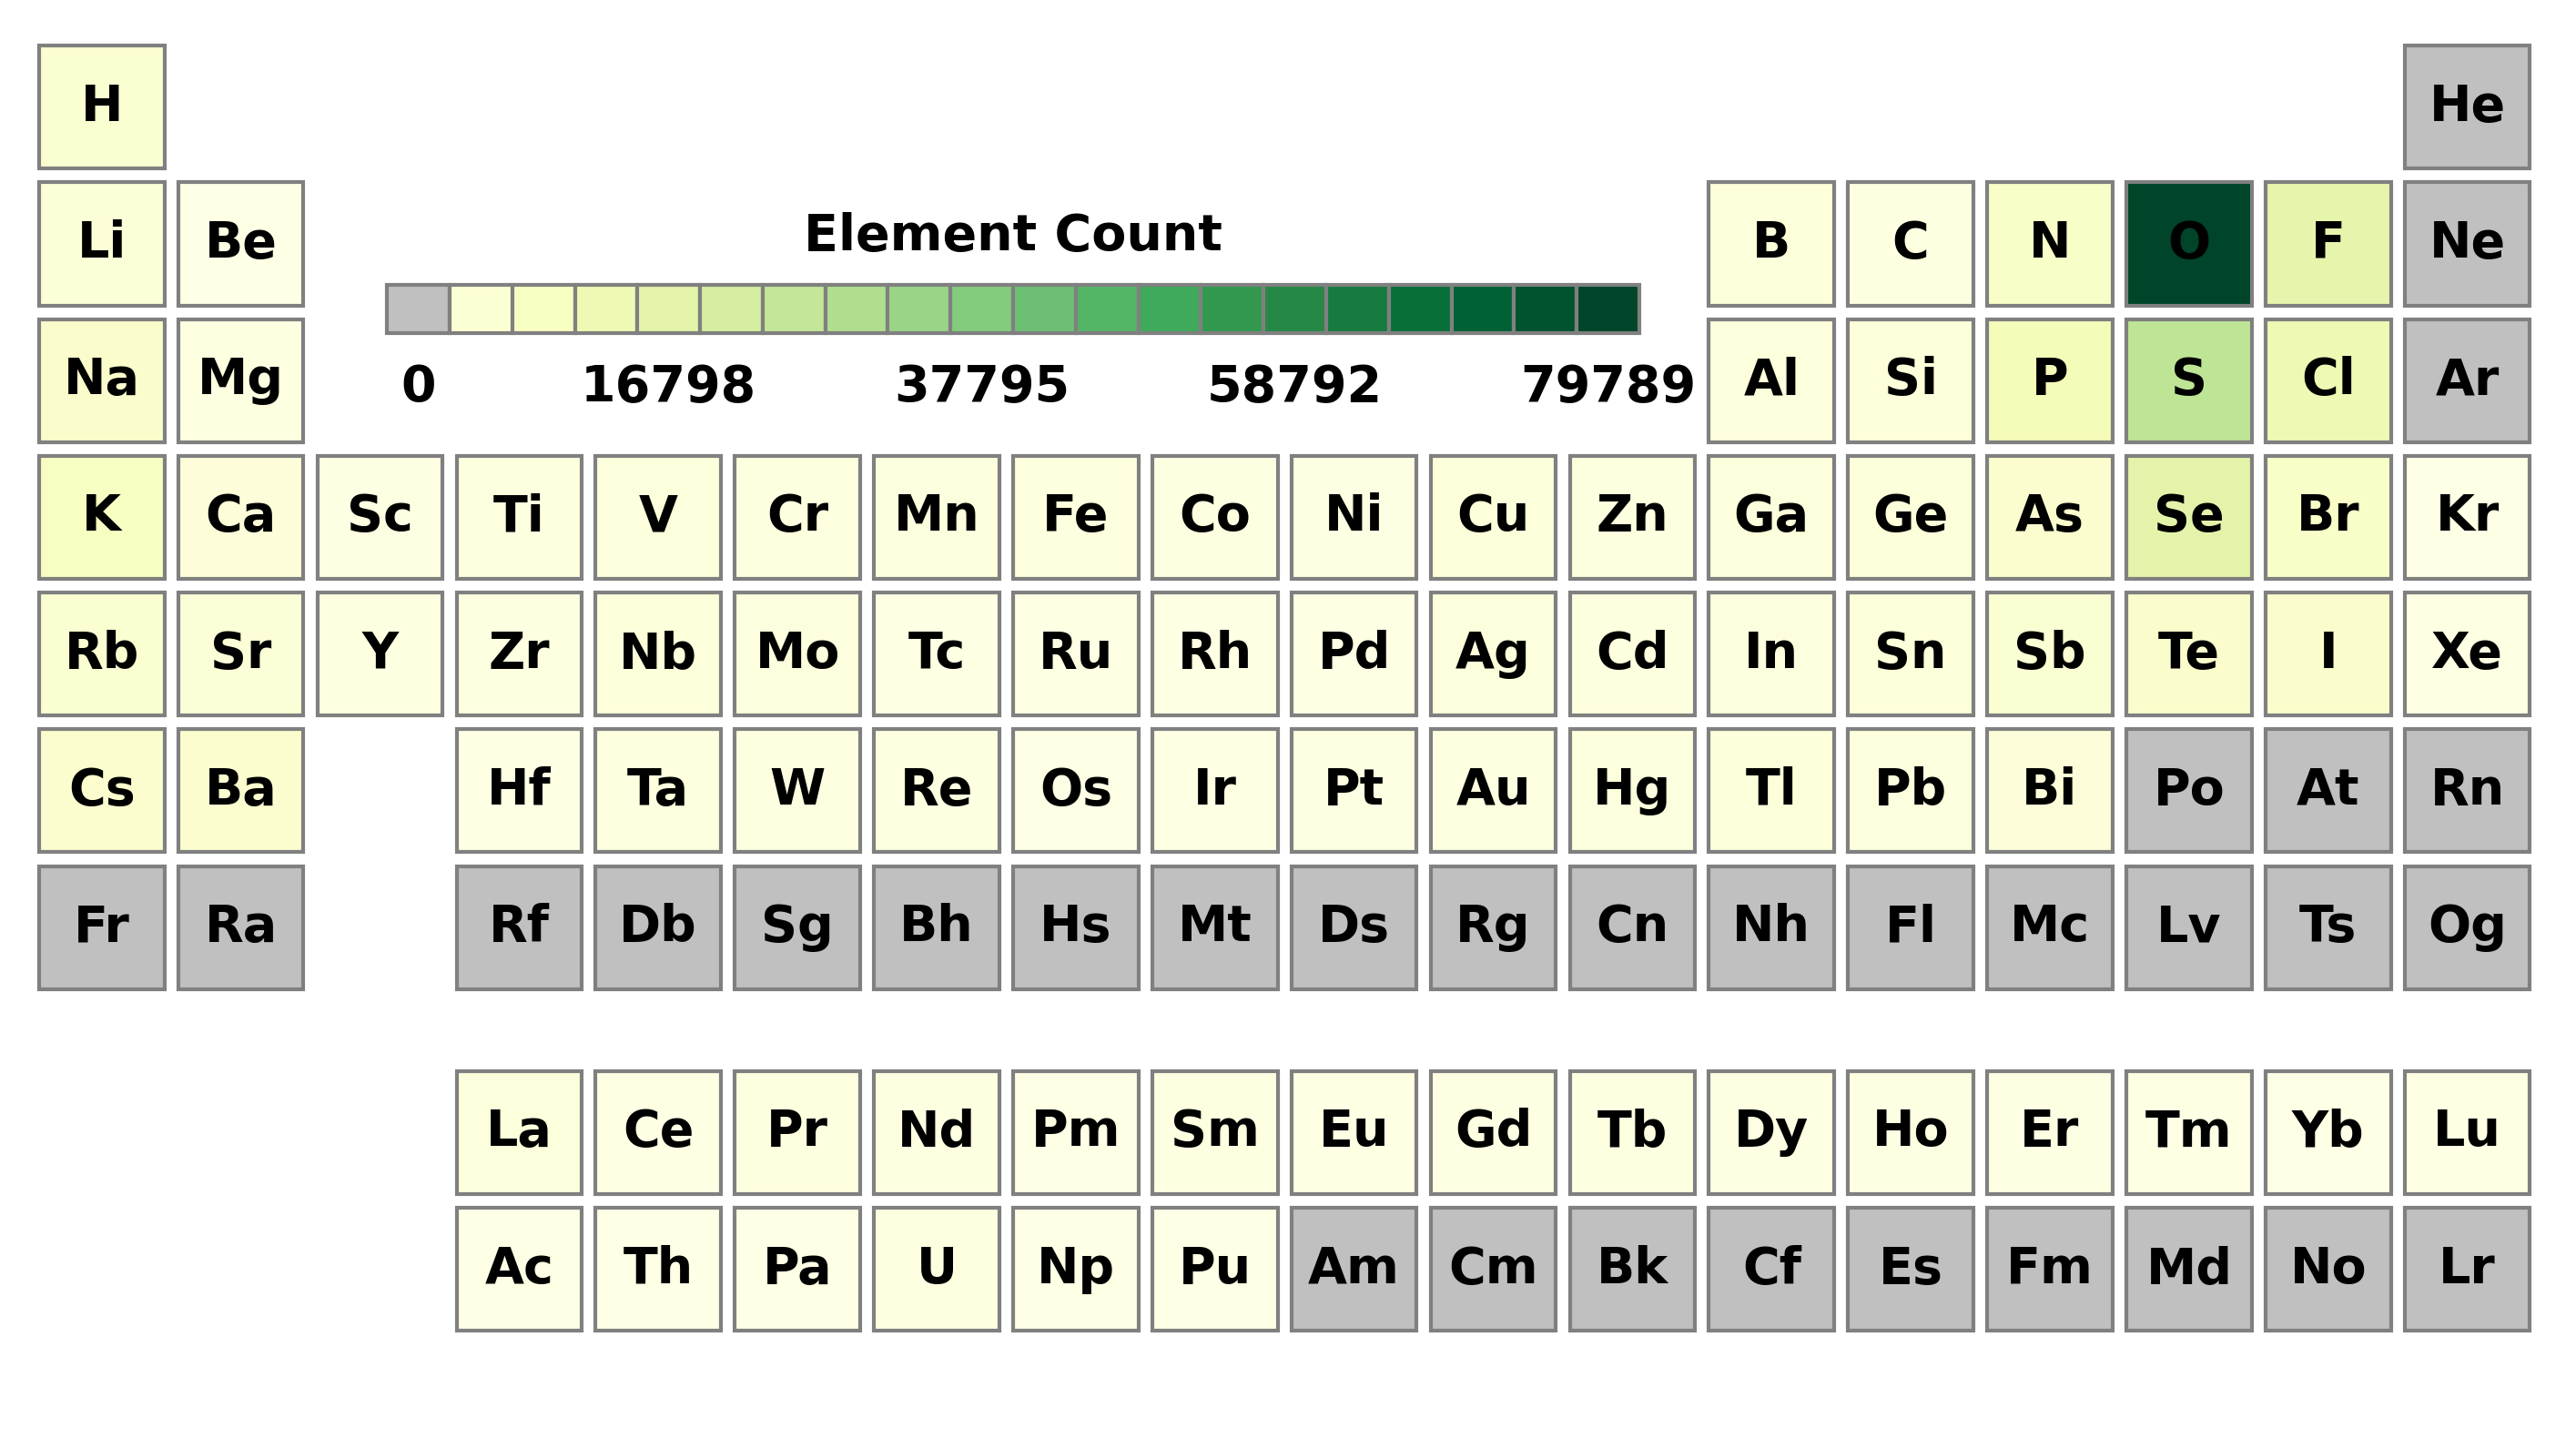

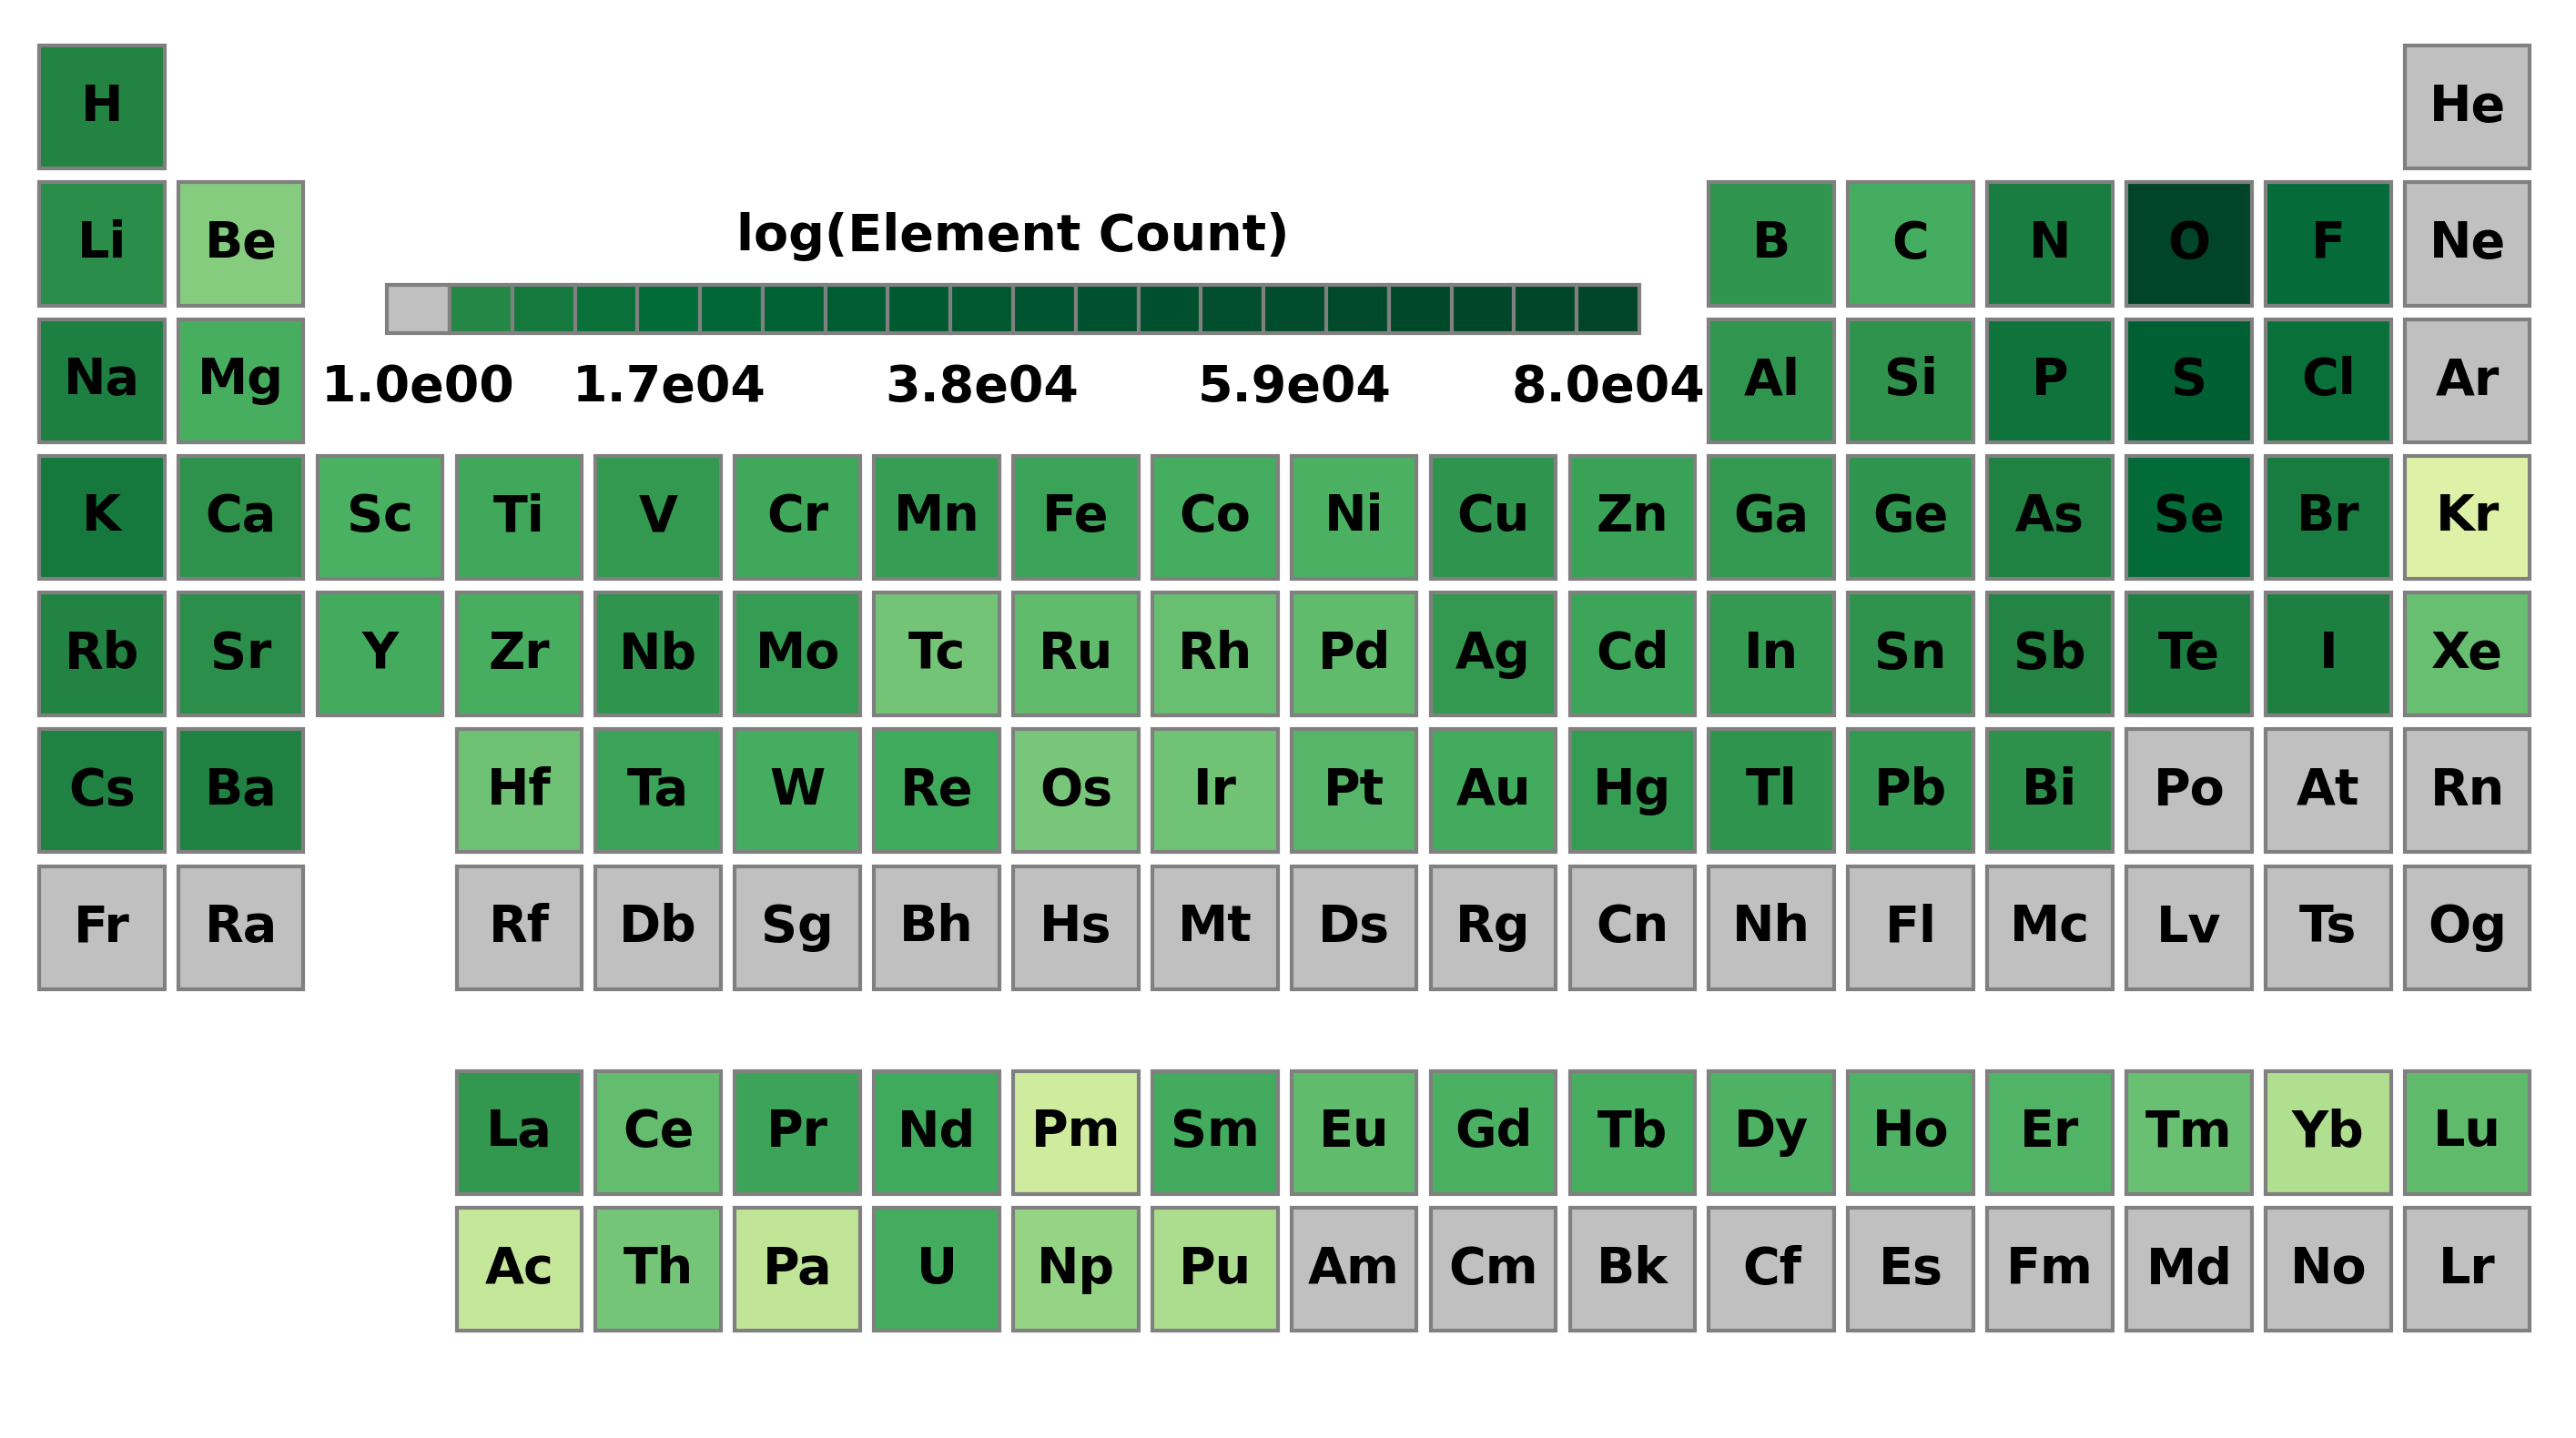

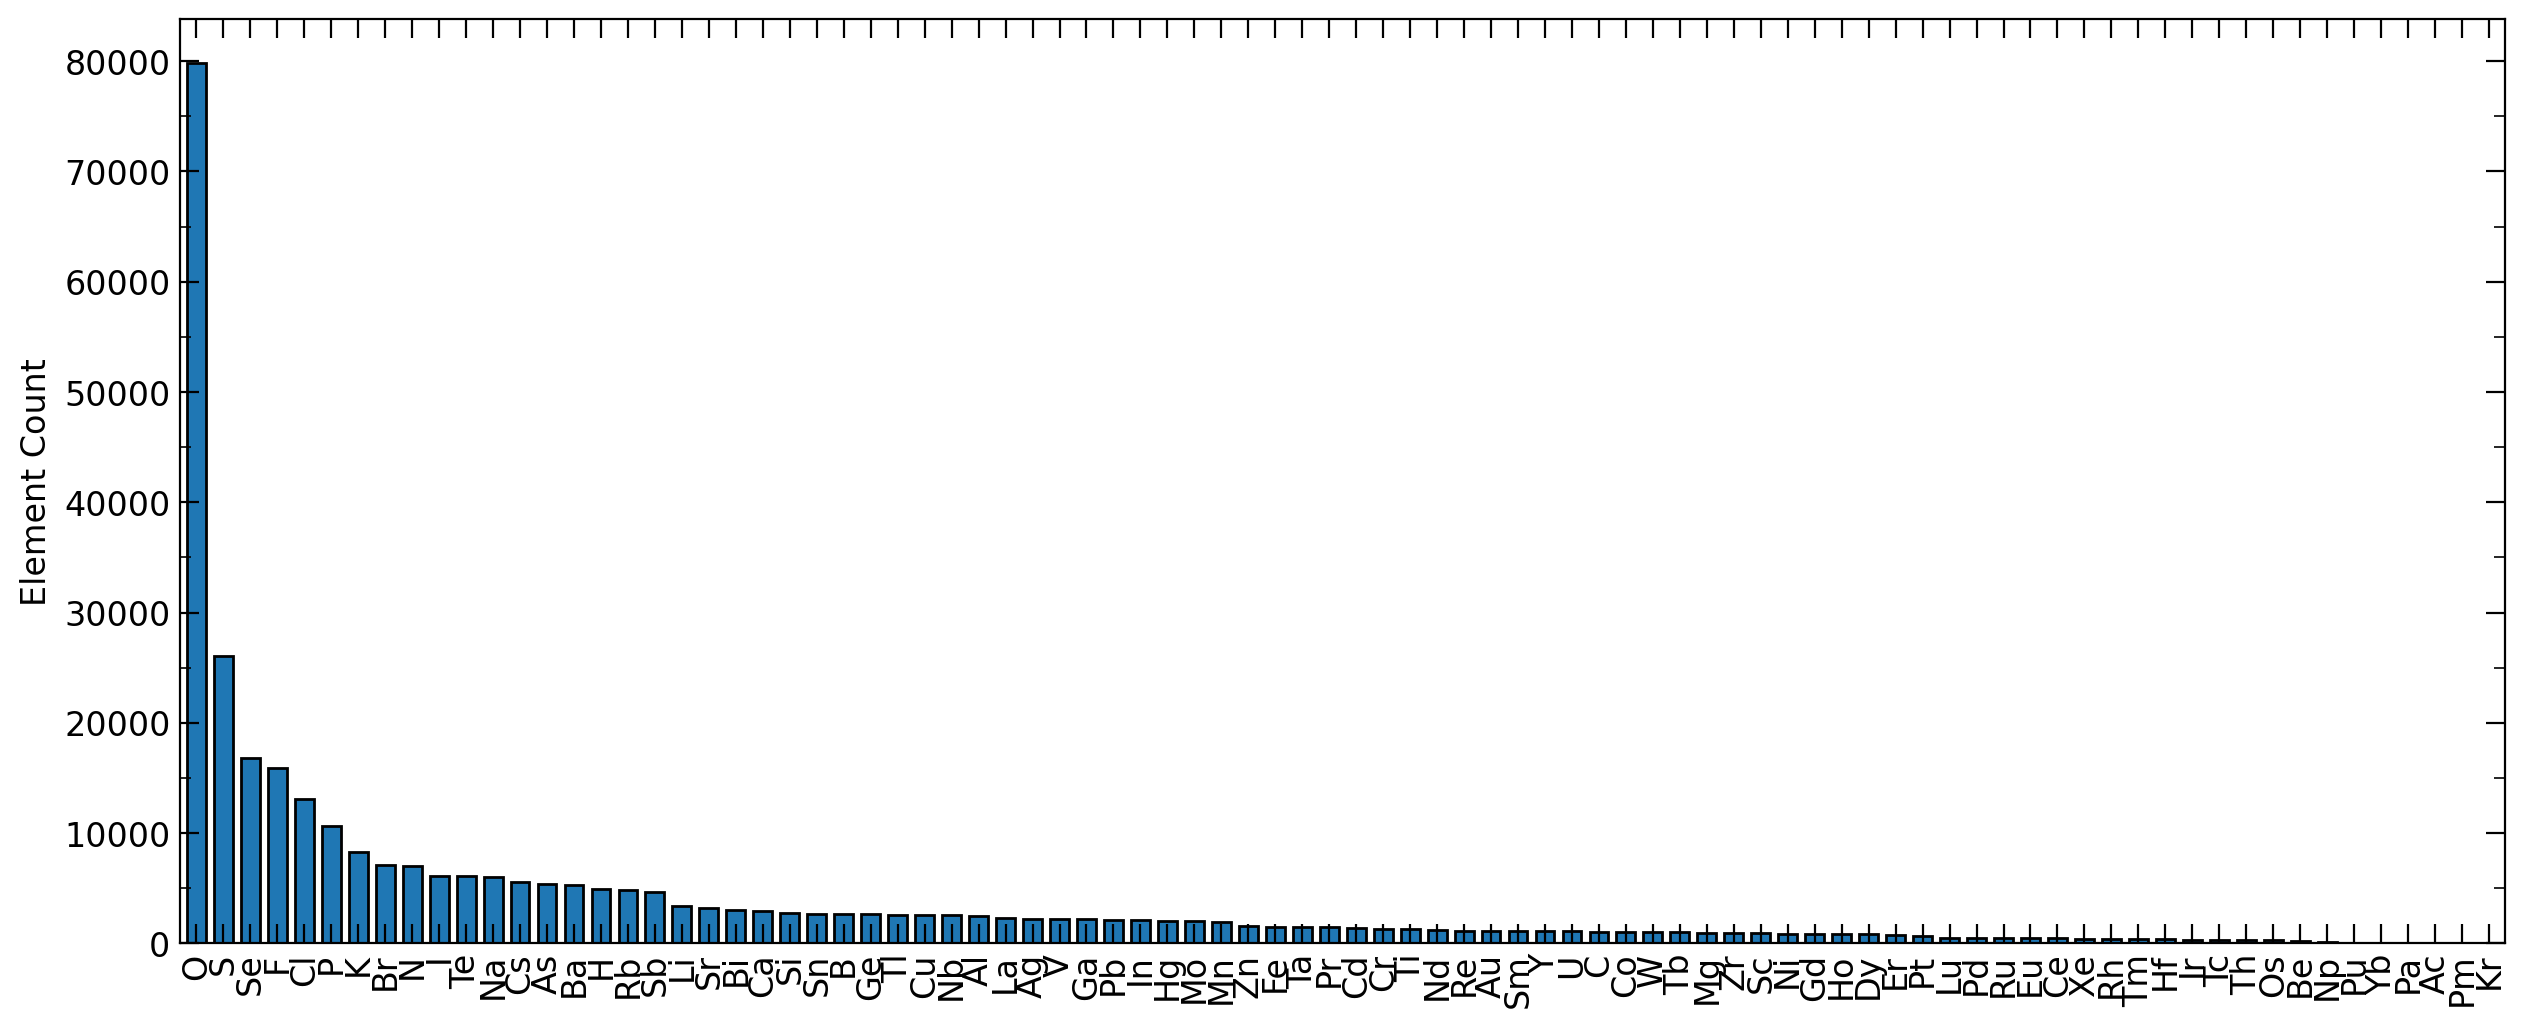

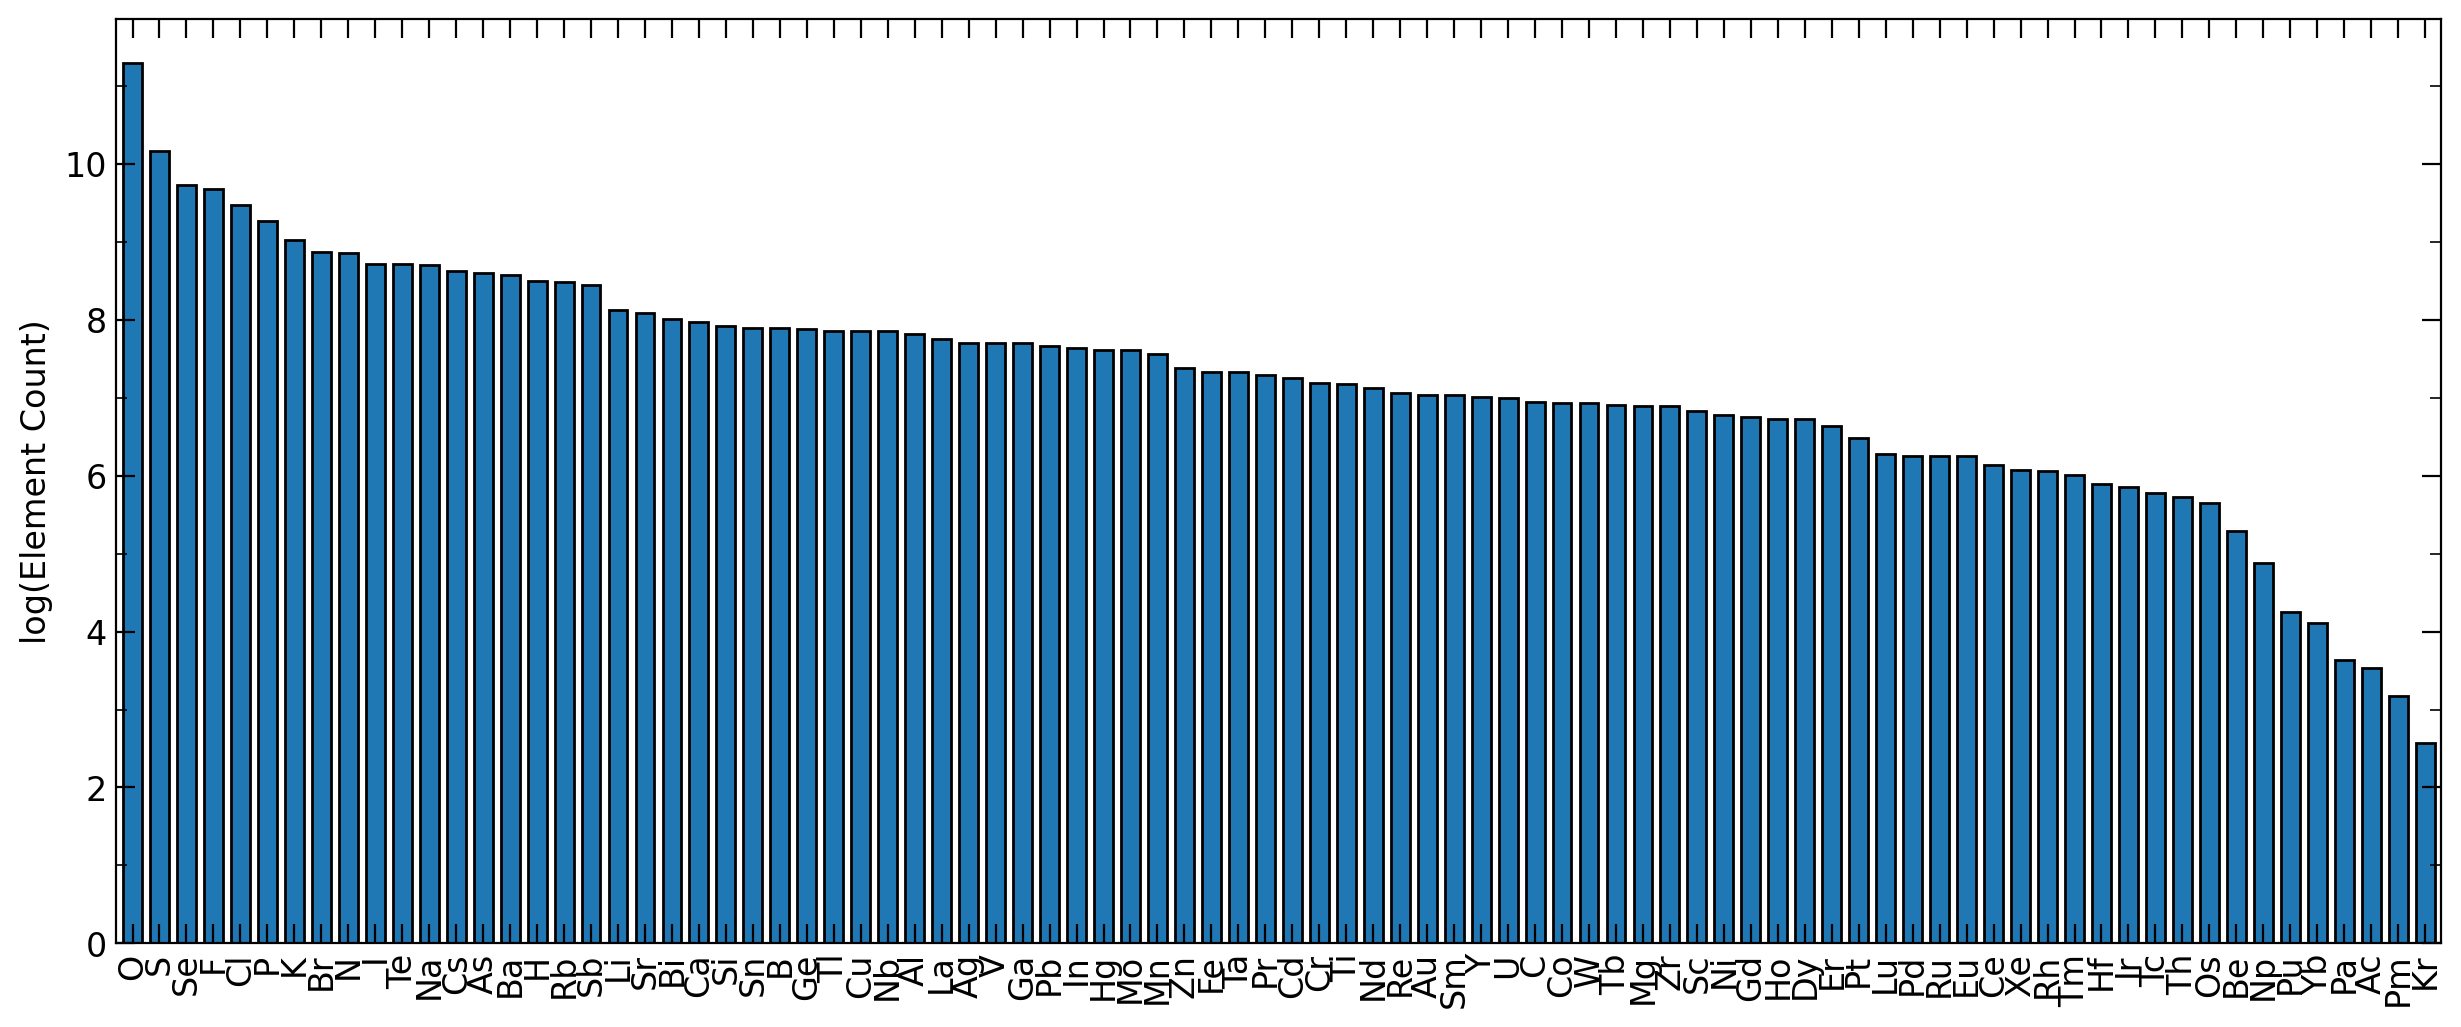

In [12]:
# Visualizing elemental prevalence in the dataset
import sys
from Utools.ML_figures.figures import element_prevalence
# To import the custom module from a specific path
sys.path.insert(0, os.path.join(current_dir))
formula = mp_trans_df.iloc[:, 0]

save_dir = os.path.join(current_dir, './figures/element_prevalence/used_data/mp')
os.makedirs(save_dir, exist_ok=True)

os.chdir(os.path.join(current_dir, './Utools'))
element_prevalence(formula,
                   name='element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=True)

plt.rcParams.update({'font.size': 12})
element_prevalence(formula,
                   name='element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=True)
os.chdir(current_dir)

In [13]:
# Create the directory if it doesn't exist
distribution_save_dir = os.path.join(current_dir, 'figures', 'data_distribution', 'used_data', 'mp')
os.makedirs(distribution_save_dir, exist_ok=True)

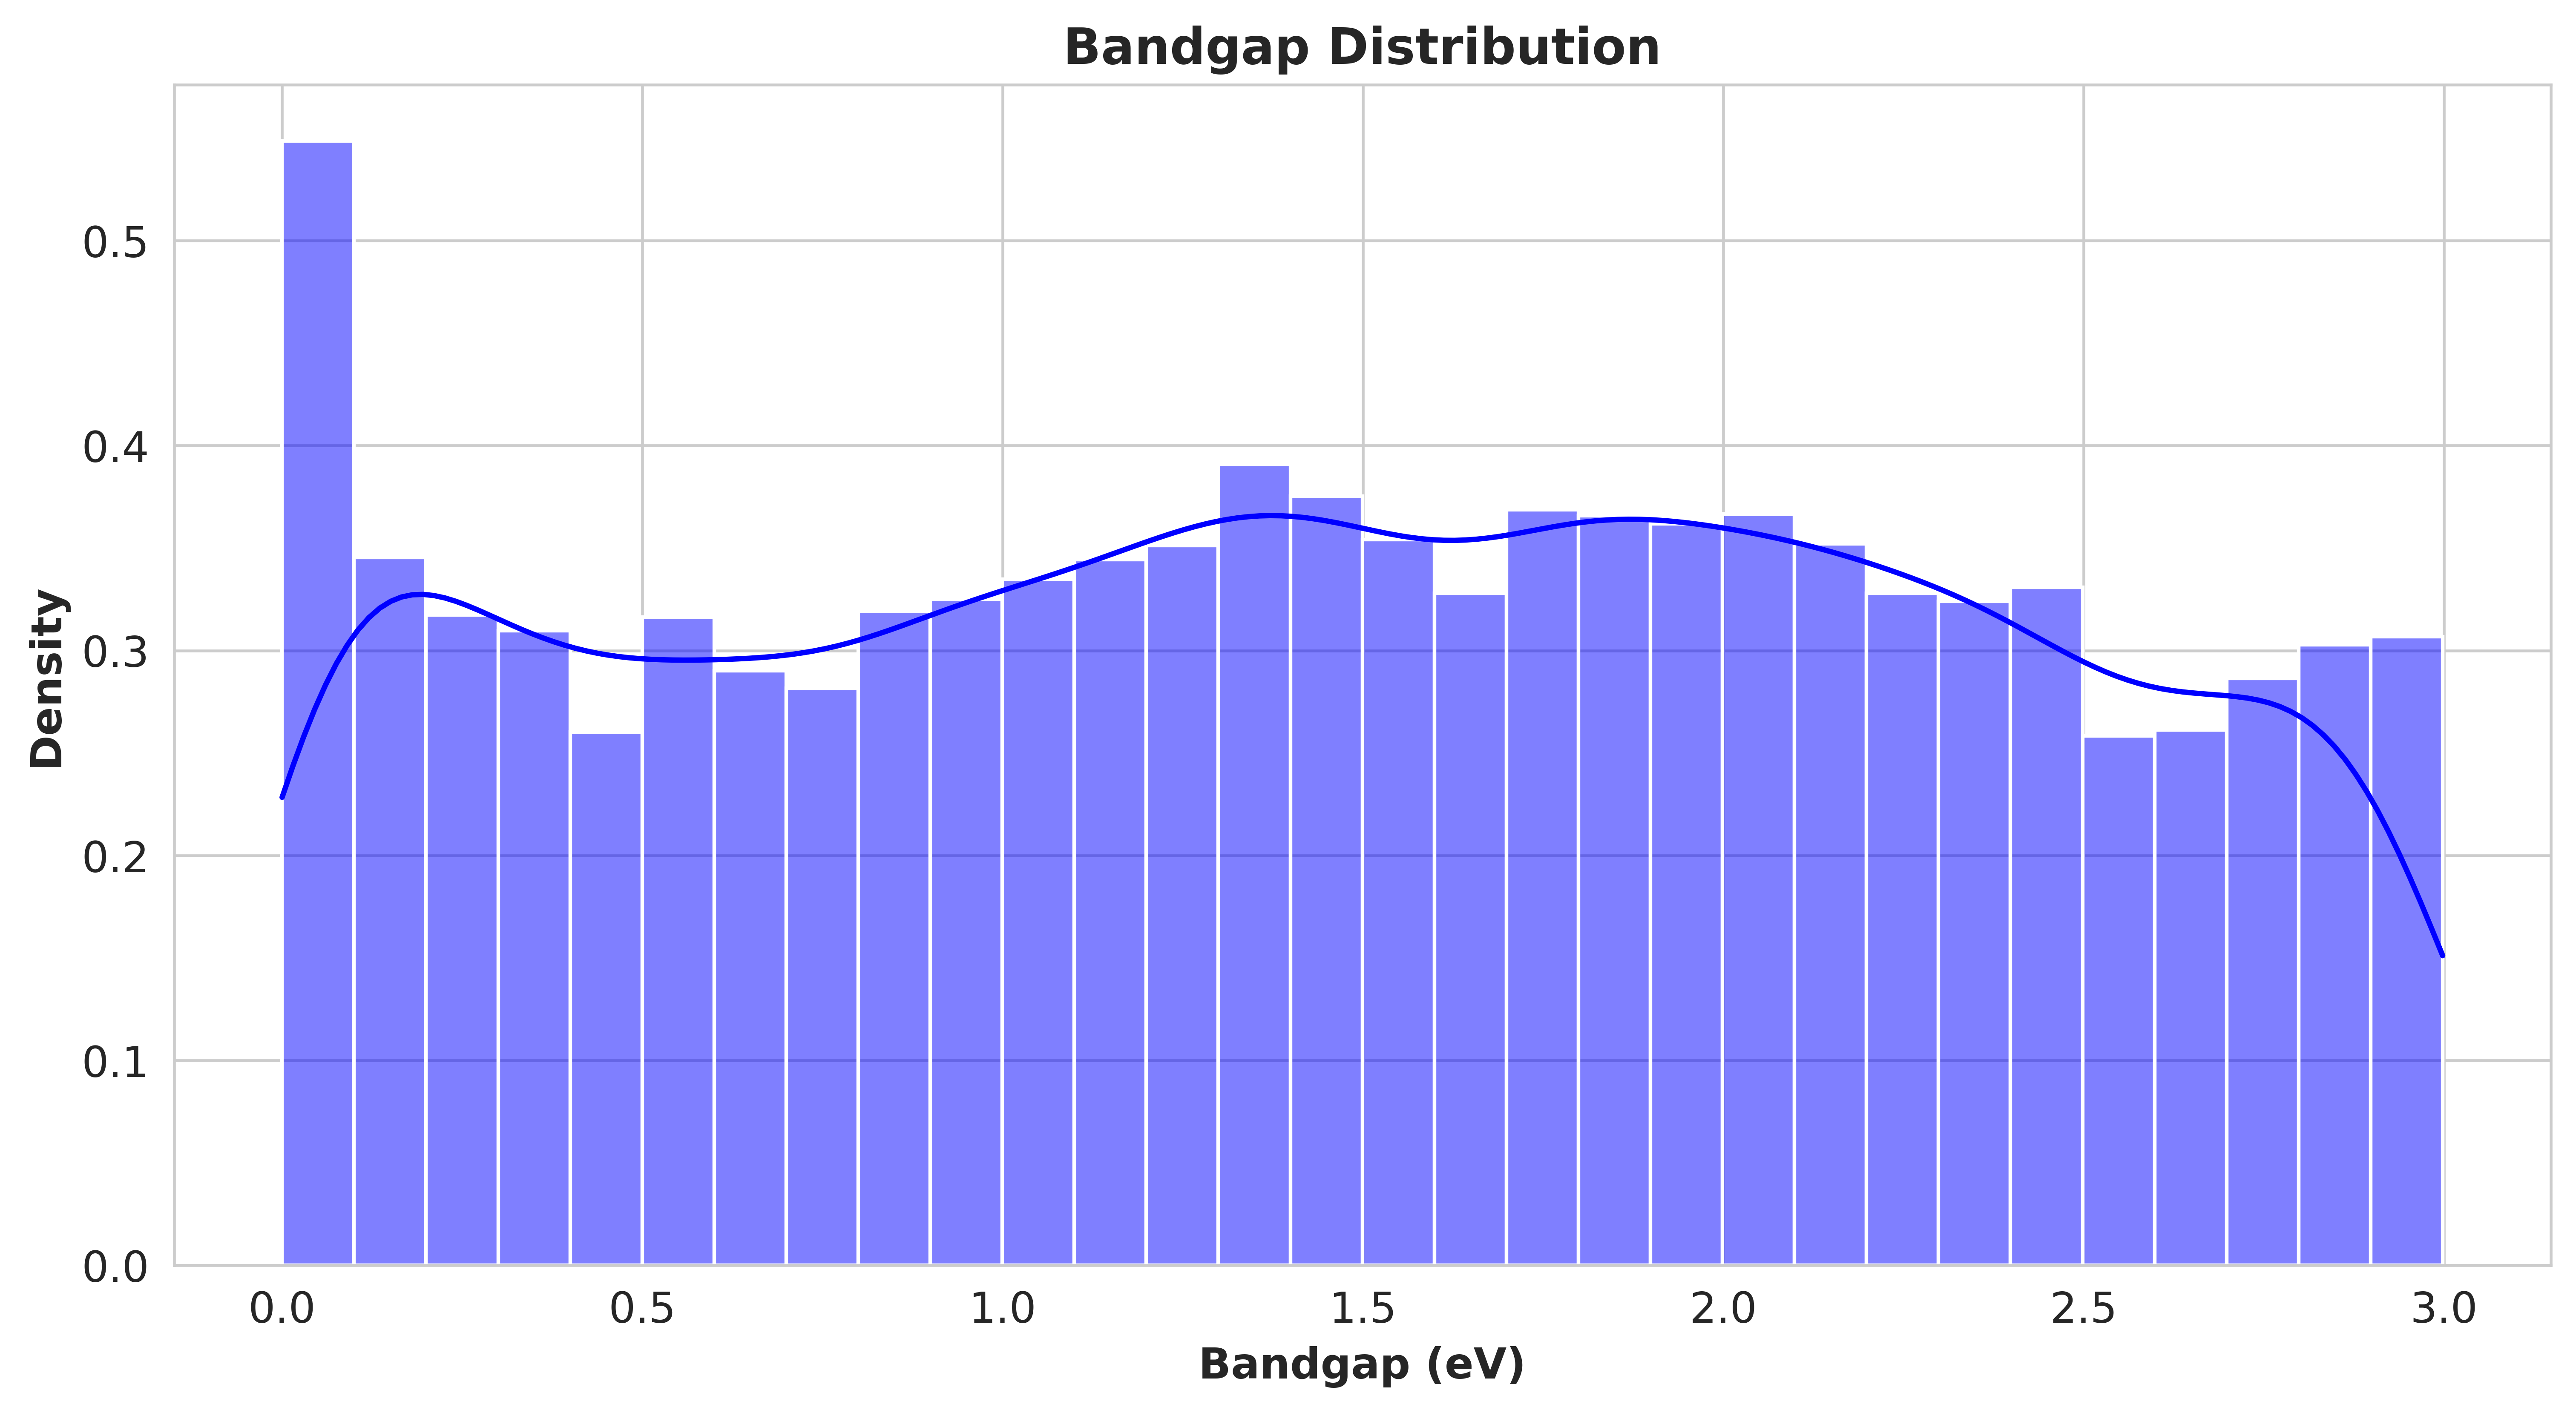

In [14]:
# draw a distribution plot of the bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(mp_trans_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(distribution_save_dir, 'bandgap_distribution.png'), dpi=300)
plt.show()

In [15]:
# 查看数据中氧化物和非氧化物的带隙分布情况
oxides_df = mp_trans_df[mp_trans_df['composition'].str.contains('O')]
non_oxides_df = mp_trans_df[~mp_trans_df['composition'].str.contains('O')]

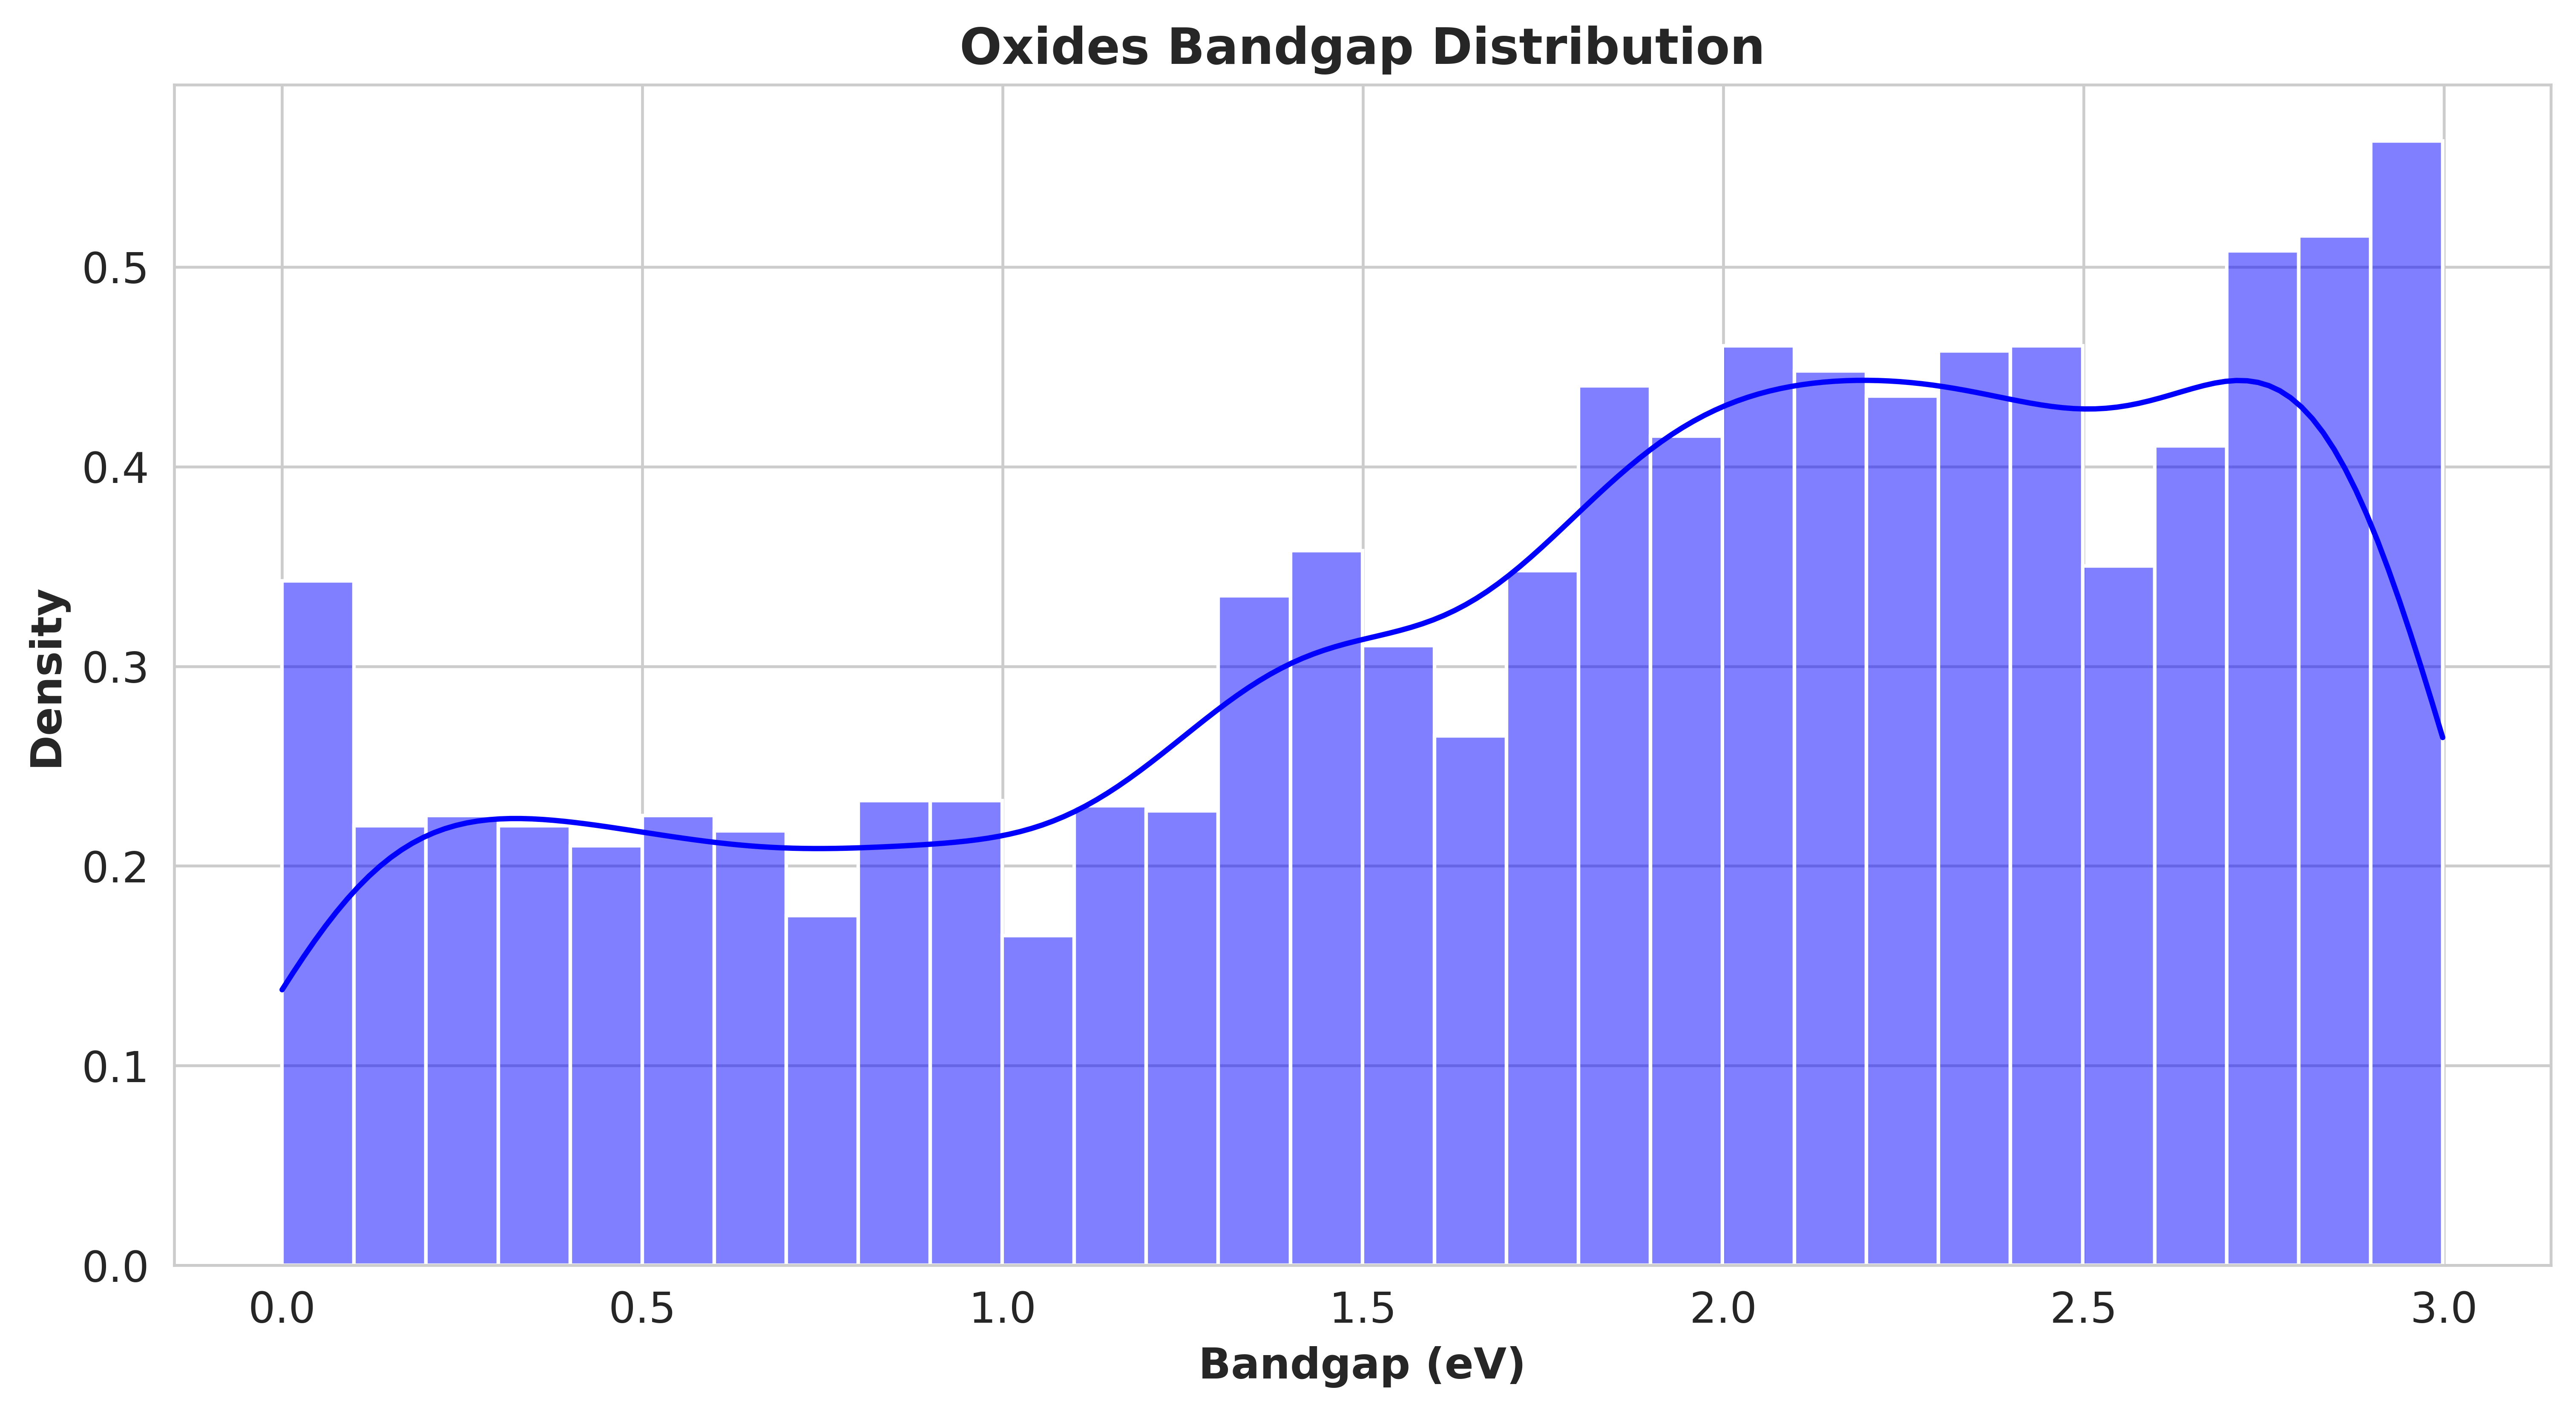

In [16]:
# draw a distribution plot of the oxides bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(oxides_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Oxides Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(distribution_save_dir, 'oxides_bandgap_distribution.png'), dpi=300)
plt.show()

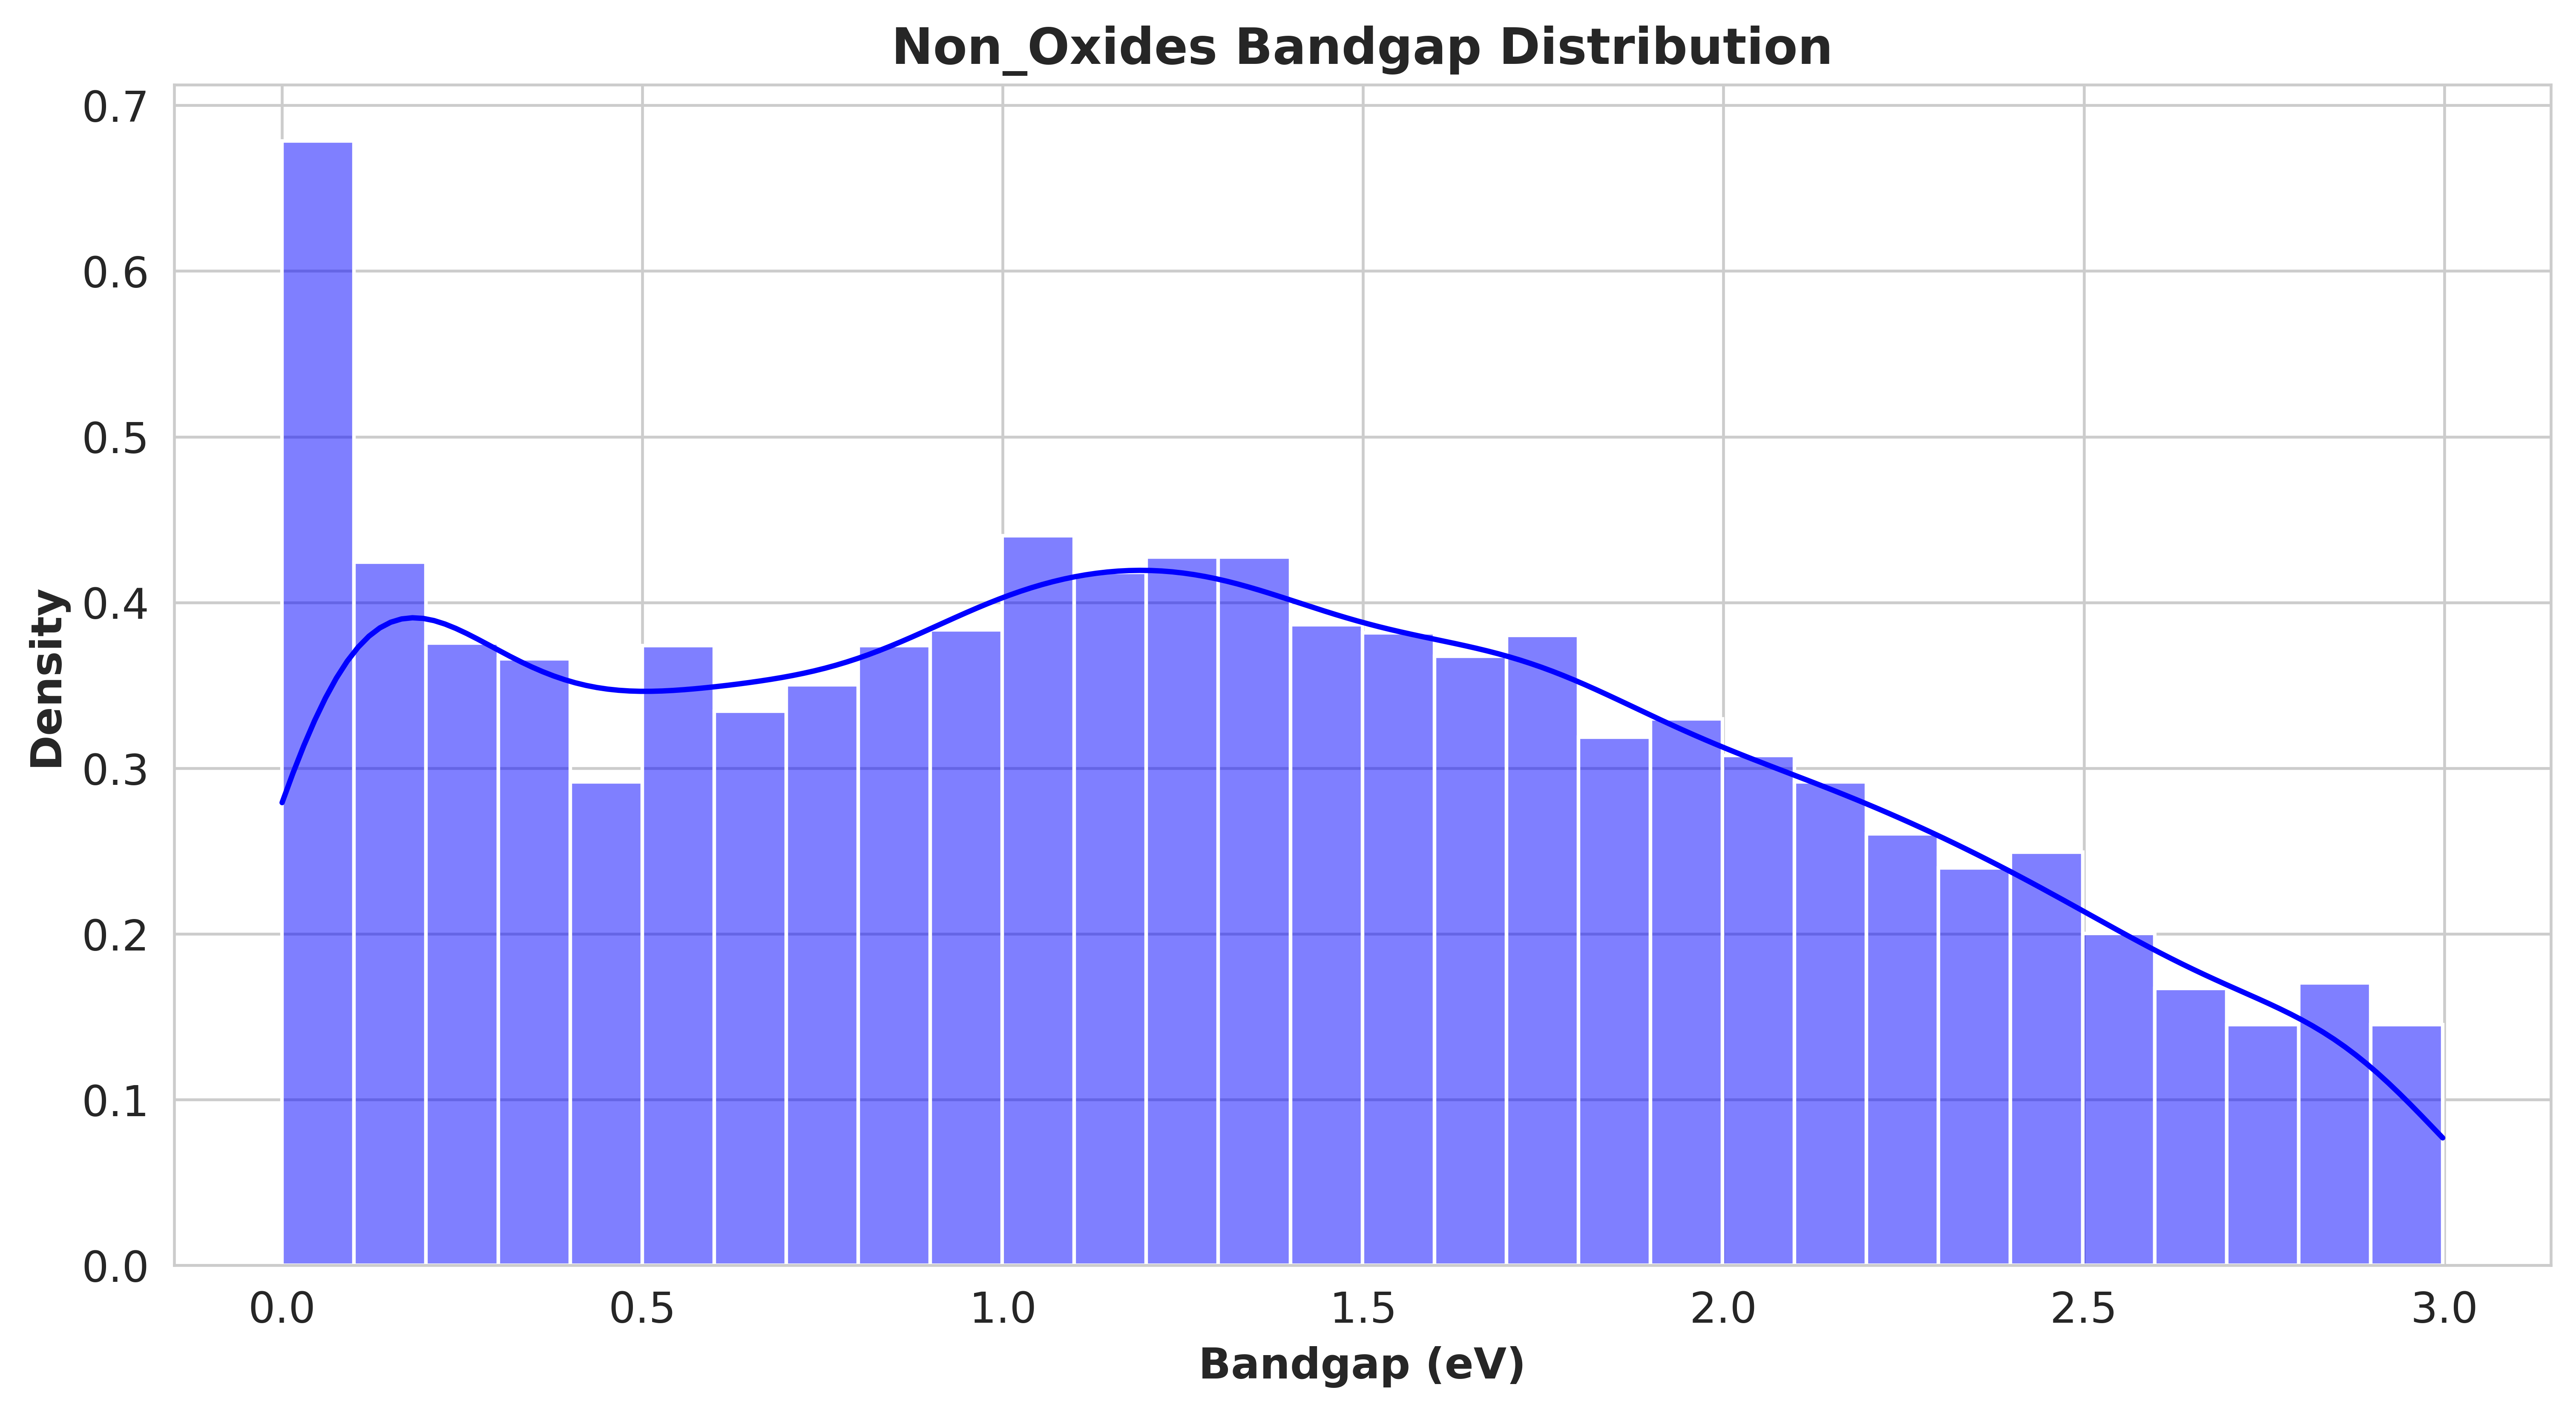

In [17]:
# draw a distribution plot of the non_oxides bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(non_oxides_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Non_Oxides Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(distribution_save_dir, 'non_oxides_bandgap_distribution.png'), dpi=300)
plt.show()

## Experimental data

In [18]:
# read the data from the csv file
file_path = os.path.join(current_dir, './Data/Ya Zhuo et data.csv')
exp_df = pd.read_csv(file_path)
exp_df.rename(columns={'Eg (eV)': 'band_gap'}, inplace=True)
exp_df.head()

,composition,band_gap
0,Hg0.7Cd0.3Te,0.35
1,CuBr,3.08
2,LuP,1.30
3,Cu3SbSe4,0.40
4,ZnO,3.44


In [19]:
exp_df.describe()

,band_gap
count,6354.000000
mean,1.252225
std,1.539961
min,0.000000
25%,0.000000
50%,0.710000
75%,2.130000
max,11.700000


In [20]:
# remove the mental data that the bandgap is 0eV, we only keep the semiconductors
exp_df = exp_df[exp_df['band_gap'] > 0]
# get rid of the data that the bandgap is greater than 3eV
exp_df = exp_df[exp_df['band_gap'] < 3]
exp_df.describe()

,band_gap
count,3130.000000
mean,1.480380
std,0.803089
min,0.020000
25%,0.800000
50%,1.500000
75%,2.167500
max,2.990000


In [21]:
exp_trans_df = stc.featurize_dataframe(exp_df, 'composition', ignore_errors=True)

StrToComposition:   0%|          | 0/3130 [00:00<?, ?it/s]

In [22]:
exp_trans_df['composition'] = exp_trans_df['composition_type']
exp_trans_df.drop(columns=['composition_type'], inplace=True)
exp_trans_df.head()

,composition,band_gap
0,"(Hg, Cd, Te)",0.35
2,"(Lu, P)",1.30
3,"(Cu, Sb, Se)",0.40
5,"(Pt, Sb)",0.08
6,"(Zn, In, S)",2.68


In [28]:
exp_trans_df.shape

(3130, 2)

In [23]:
len(exp_trans_df['composition'].unique())

1967

### 去除不需要的元素 --- 不去除

In [24]:
# # 查看exp_df中是否有重金属元素和稀土元素
# exp_trans_df[exp_trans_df['composition'].apply(lambda x: any(elem in exclude_elements for elem in x.elements))].shape

In [25]:
# # 过滤掉包含重金属元素和稀土元素的材料
# exp_trans_df = exp_trans_df[~exp_trans_df['composition'].apply(lambda x: any(elem in exclude_elements for elem in x.elements))]
# exp_trans_df.shape

In [26]:
# # 查看exp_df中是否有稀有气体元素
# exp_trans_df[exp_trans_df['composition'].apply(lambda x: any(elem in noble_gas_elements for elem in x.elements))].shape

(0, 2)

- 实验数据中不存在稀有气体元素，对此，我们在MP数据中也不考虑稀有气体元素

In [29]:
exp_trans_df['composition'] = exp_trans_df['composition'].apply(lambda x: str(x).replace(" ", ""))
exp_trans_df.head()
# Save the data of composition and band_gap to a csv file
file_path = os.path.join(current_dir, './Data/composition_data/exp_band_gap.csv')
exp_trans_df.to_csv(file_path, index=False)

### 数据分布

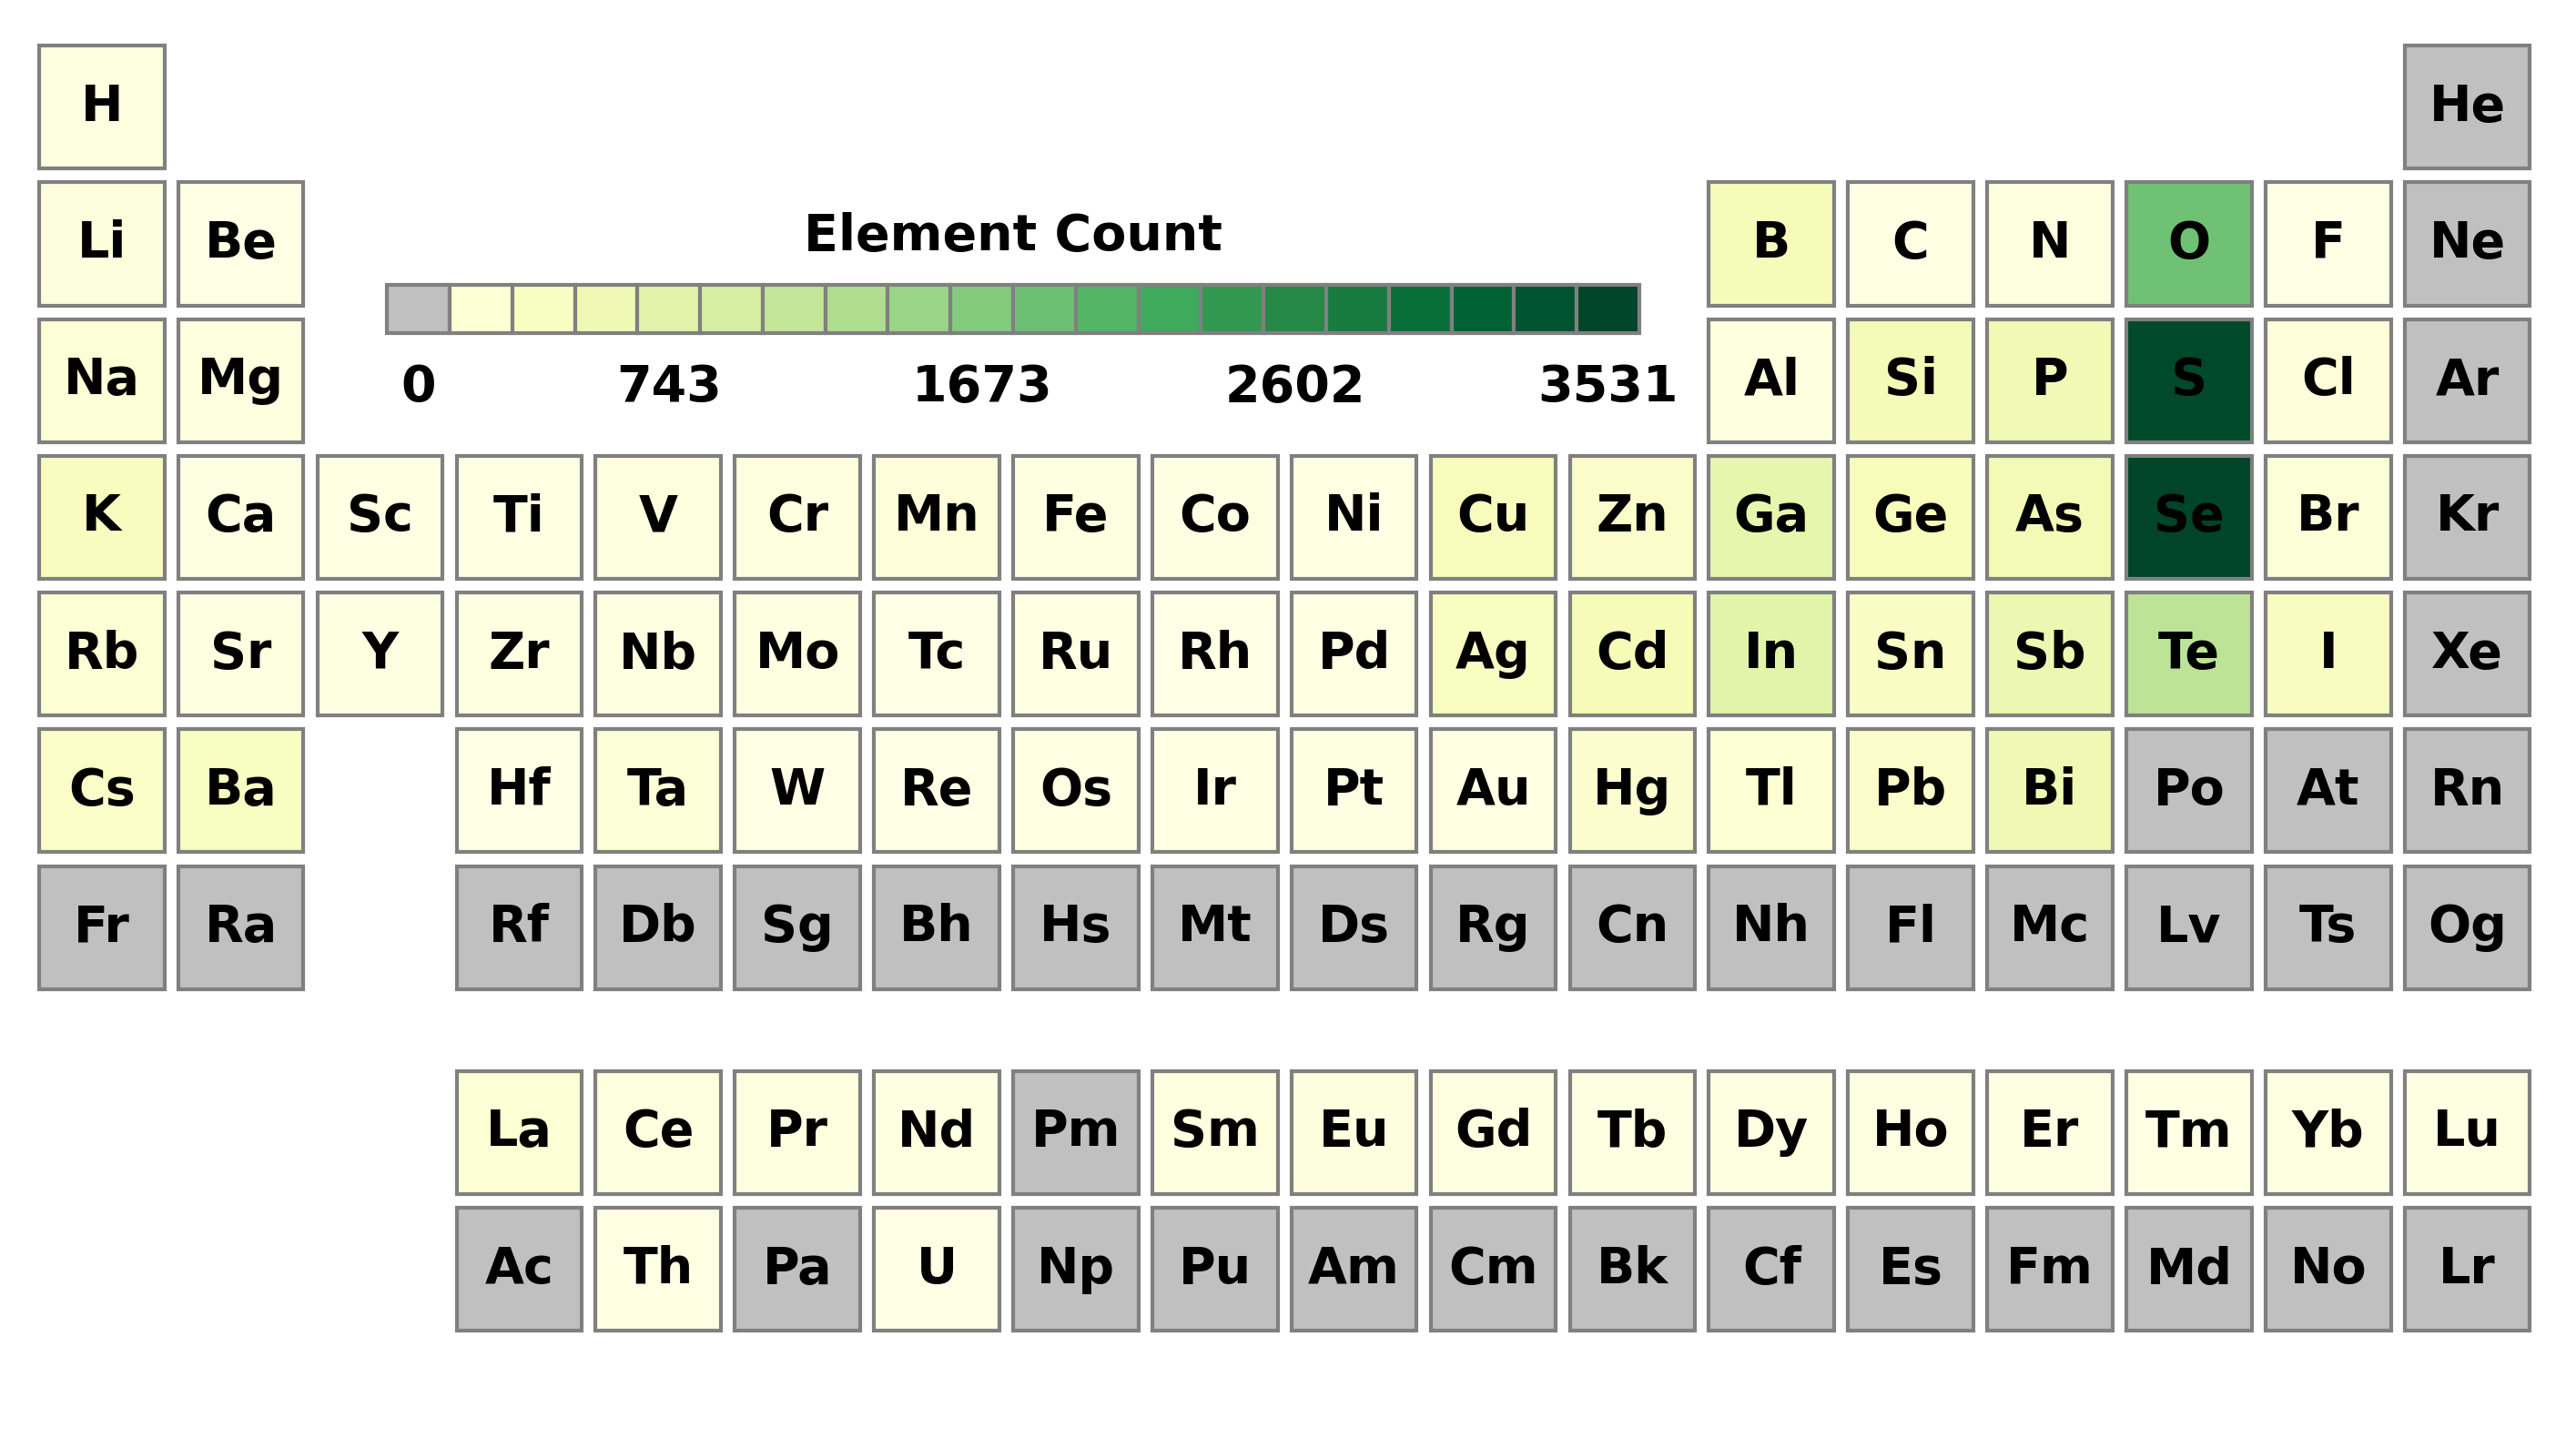

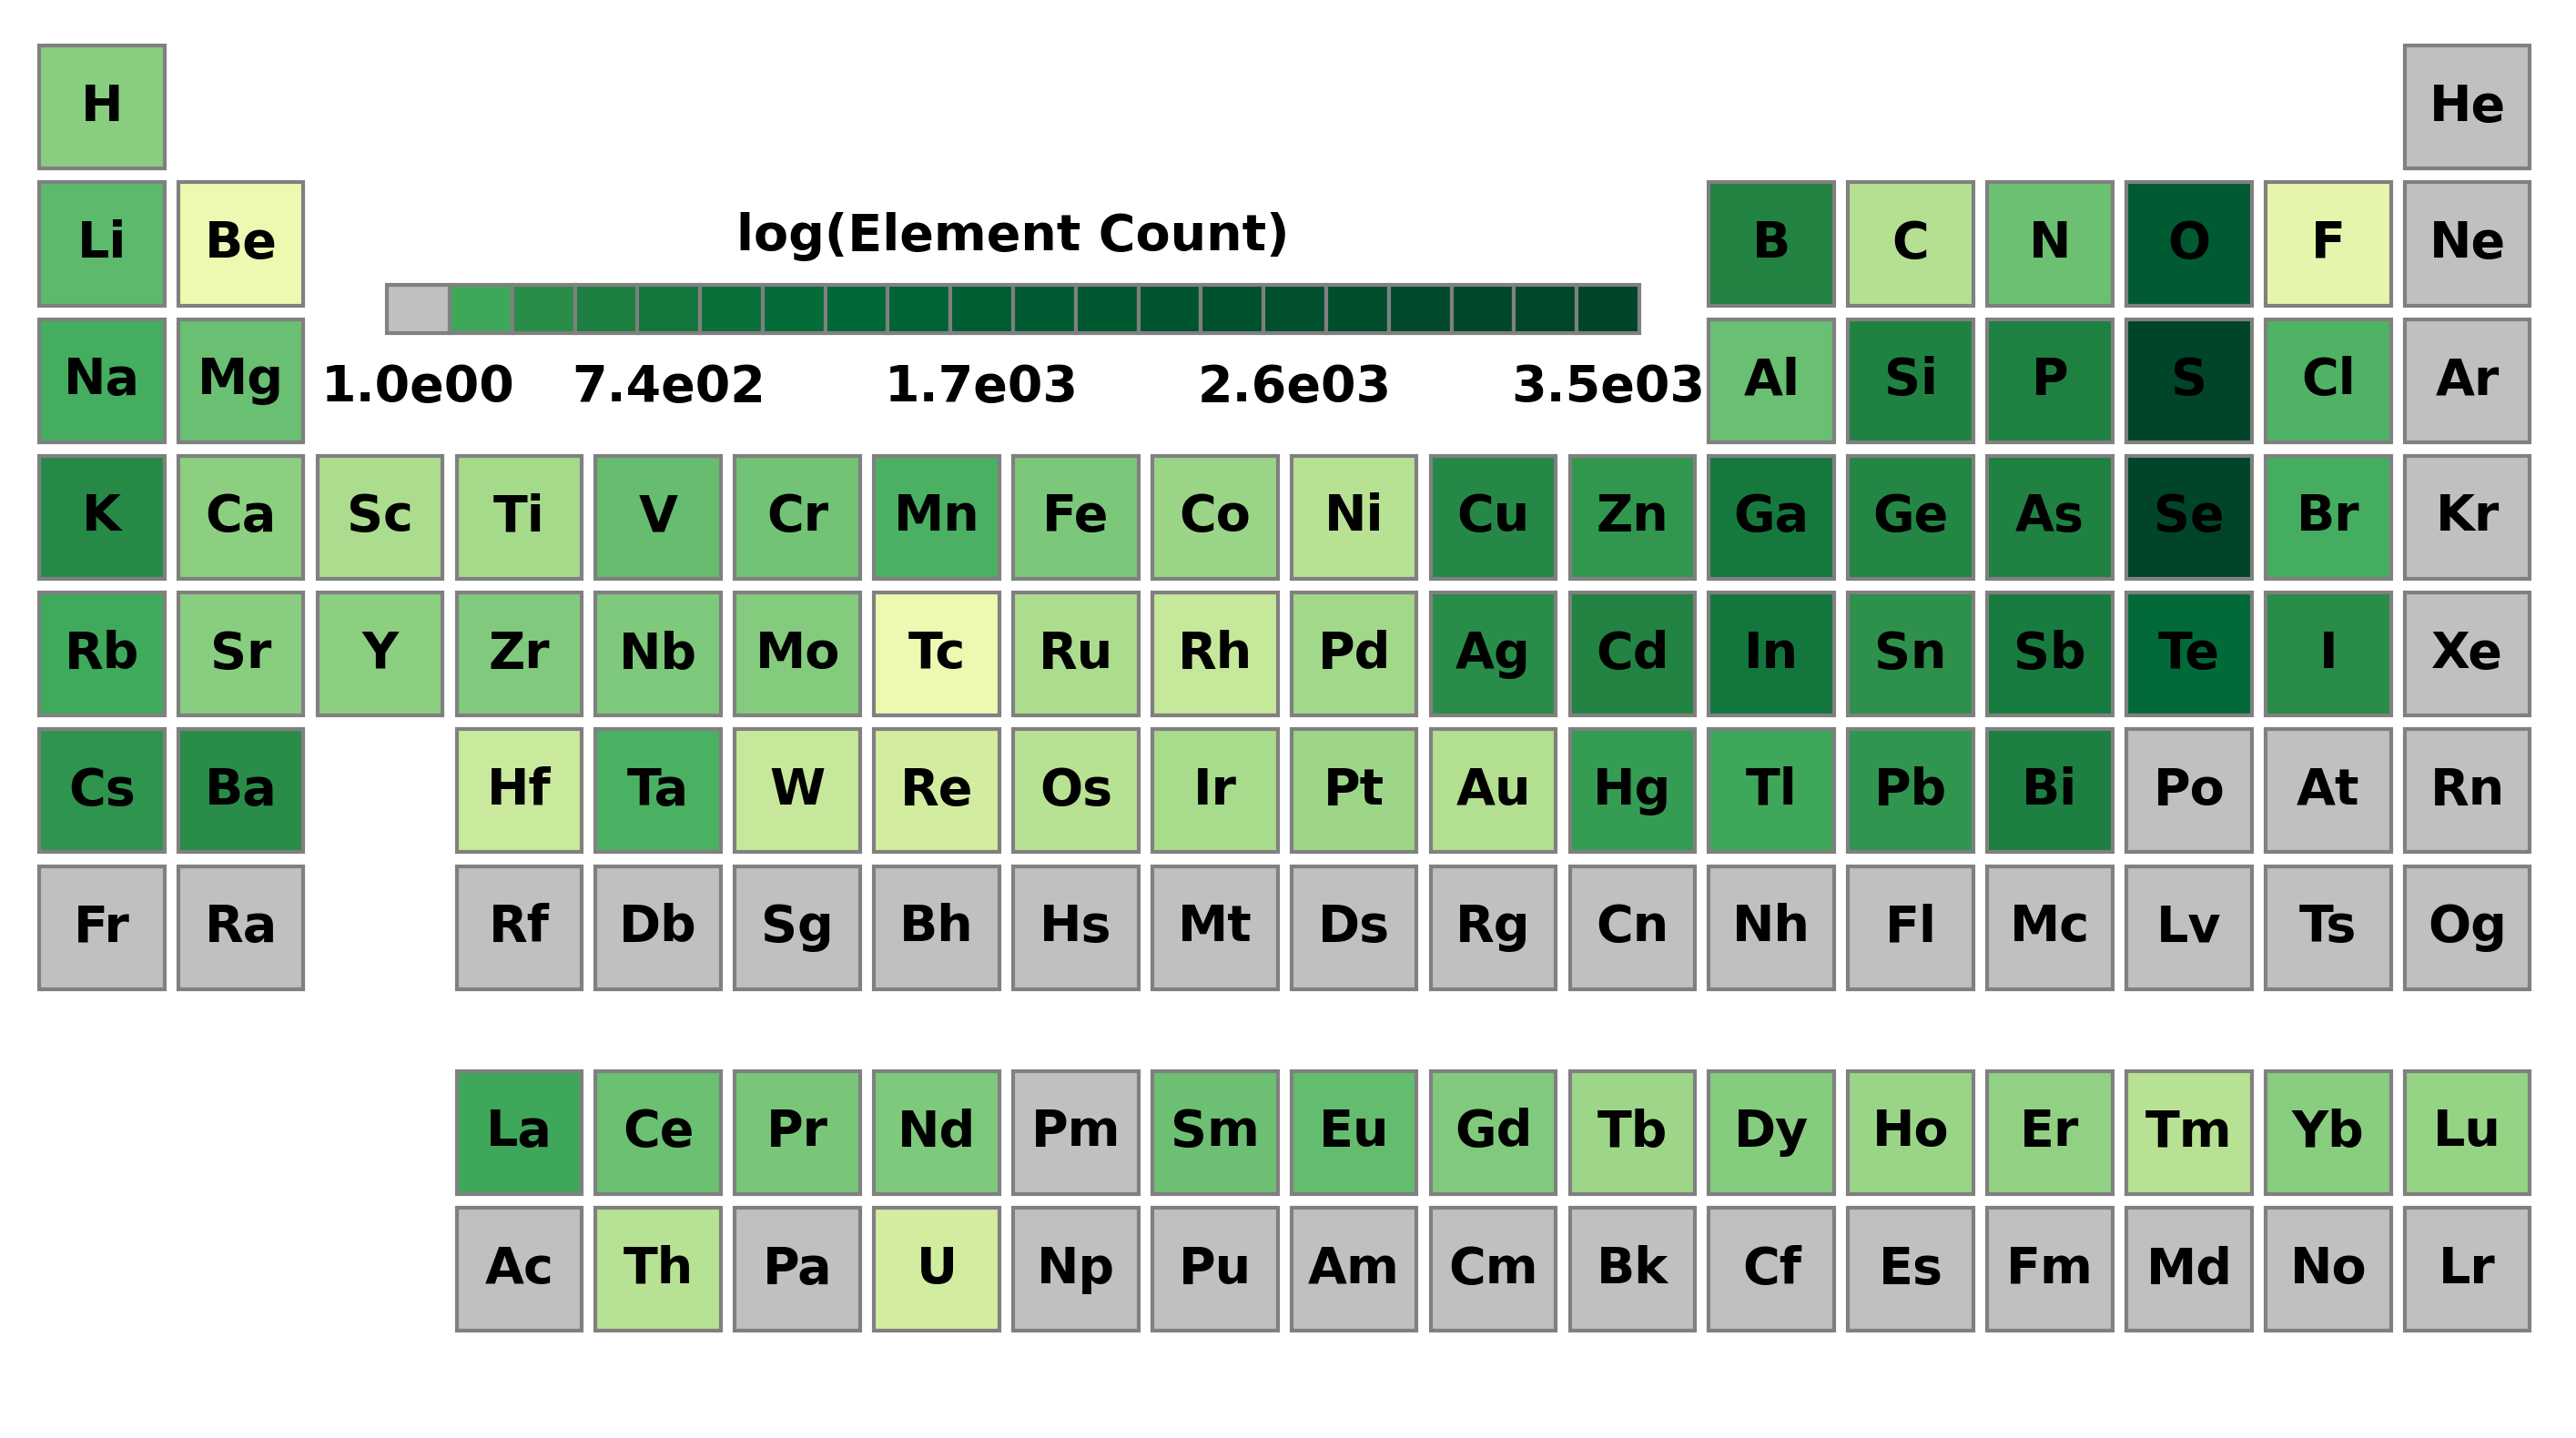

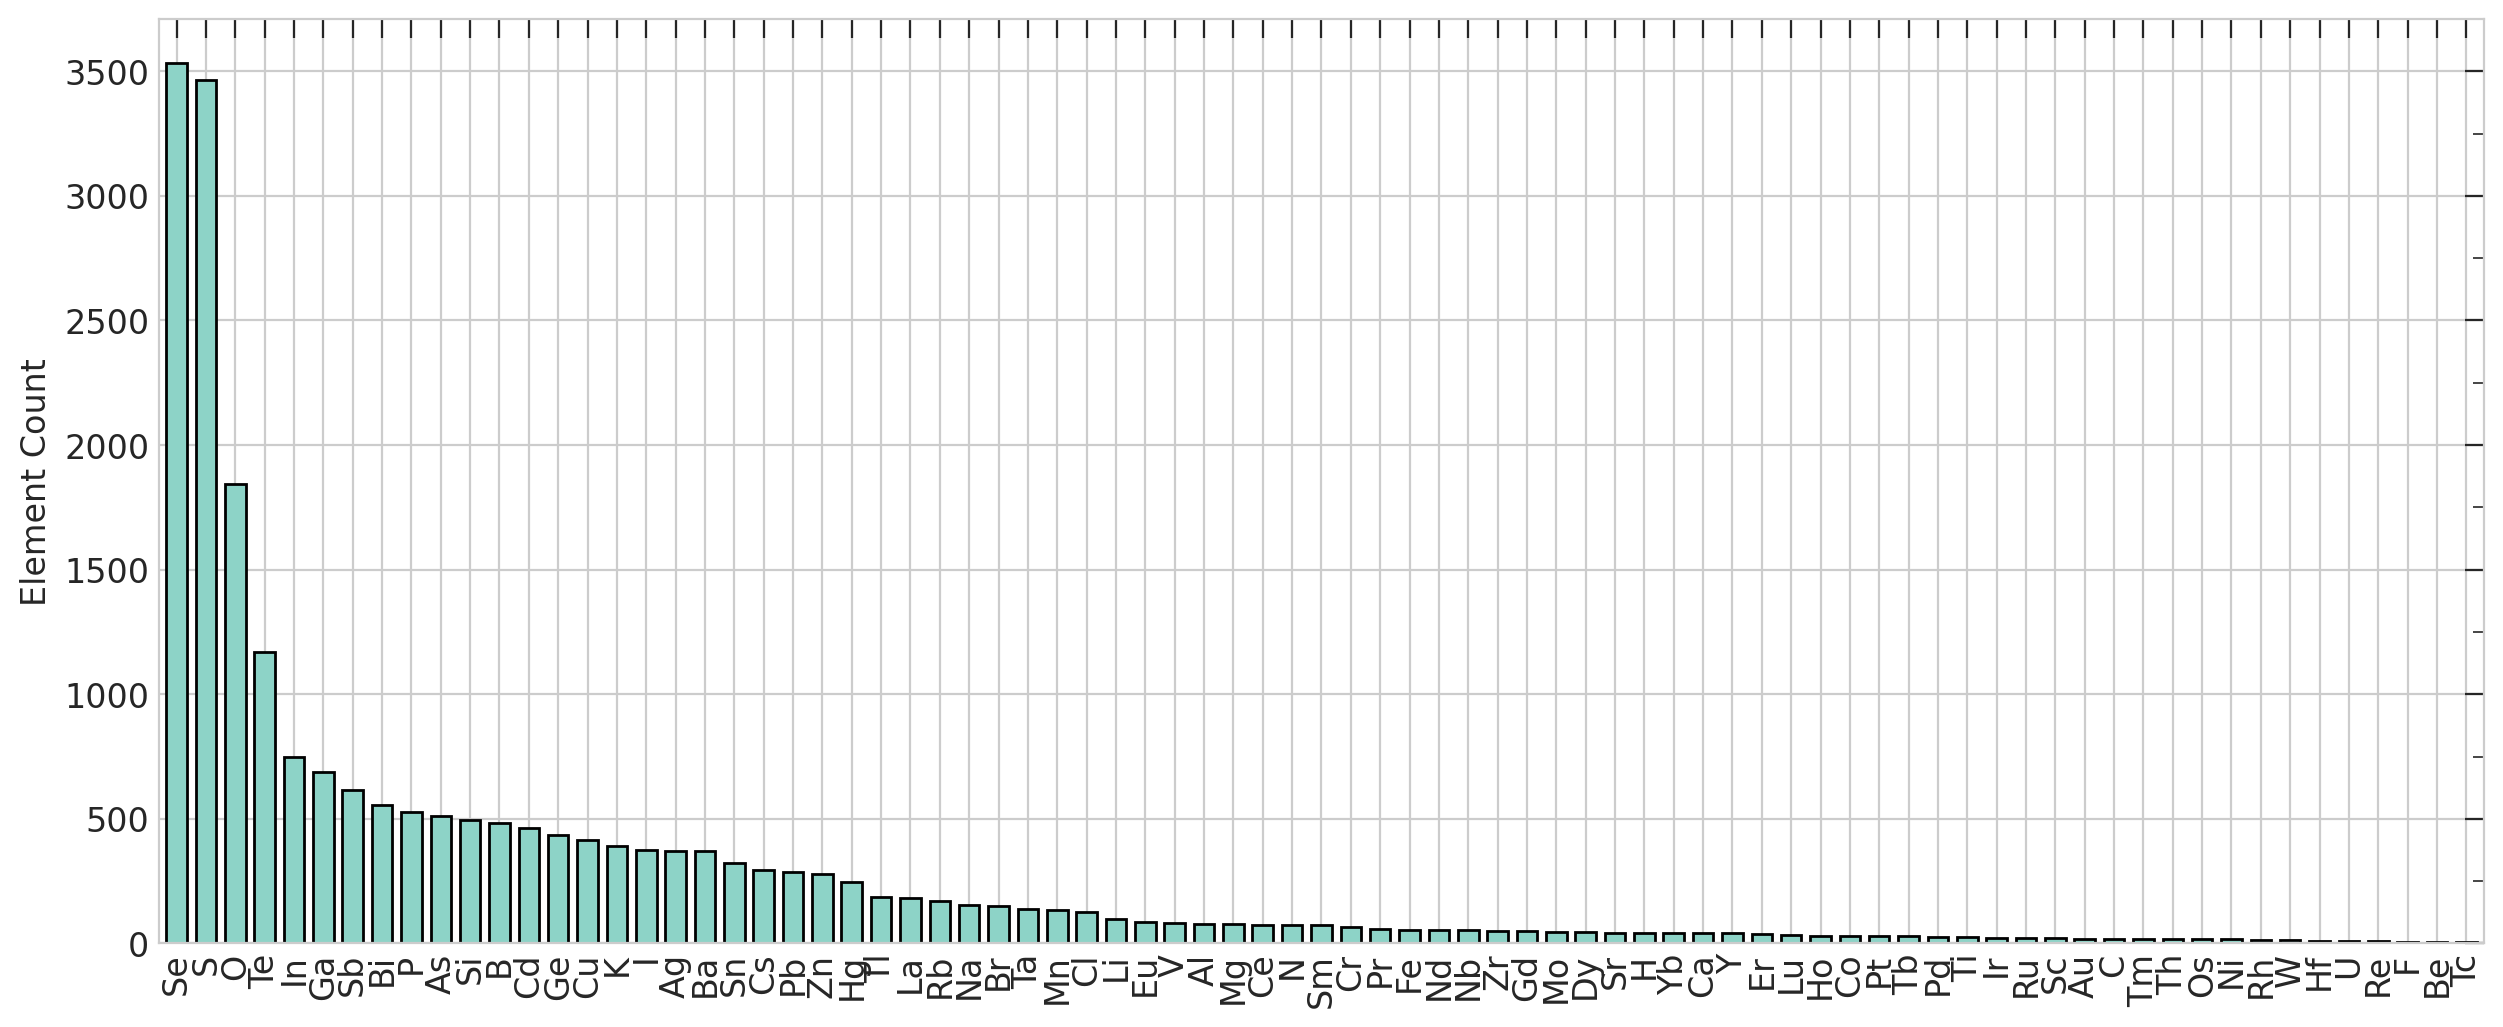

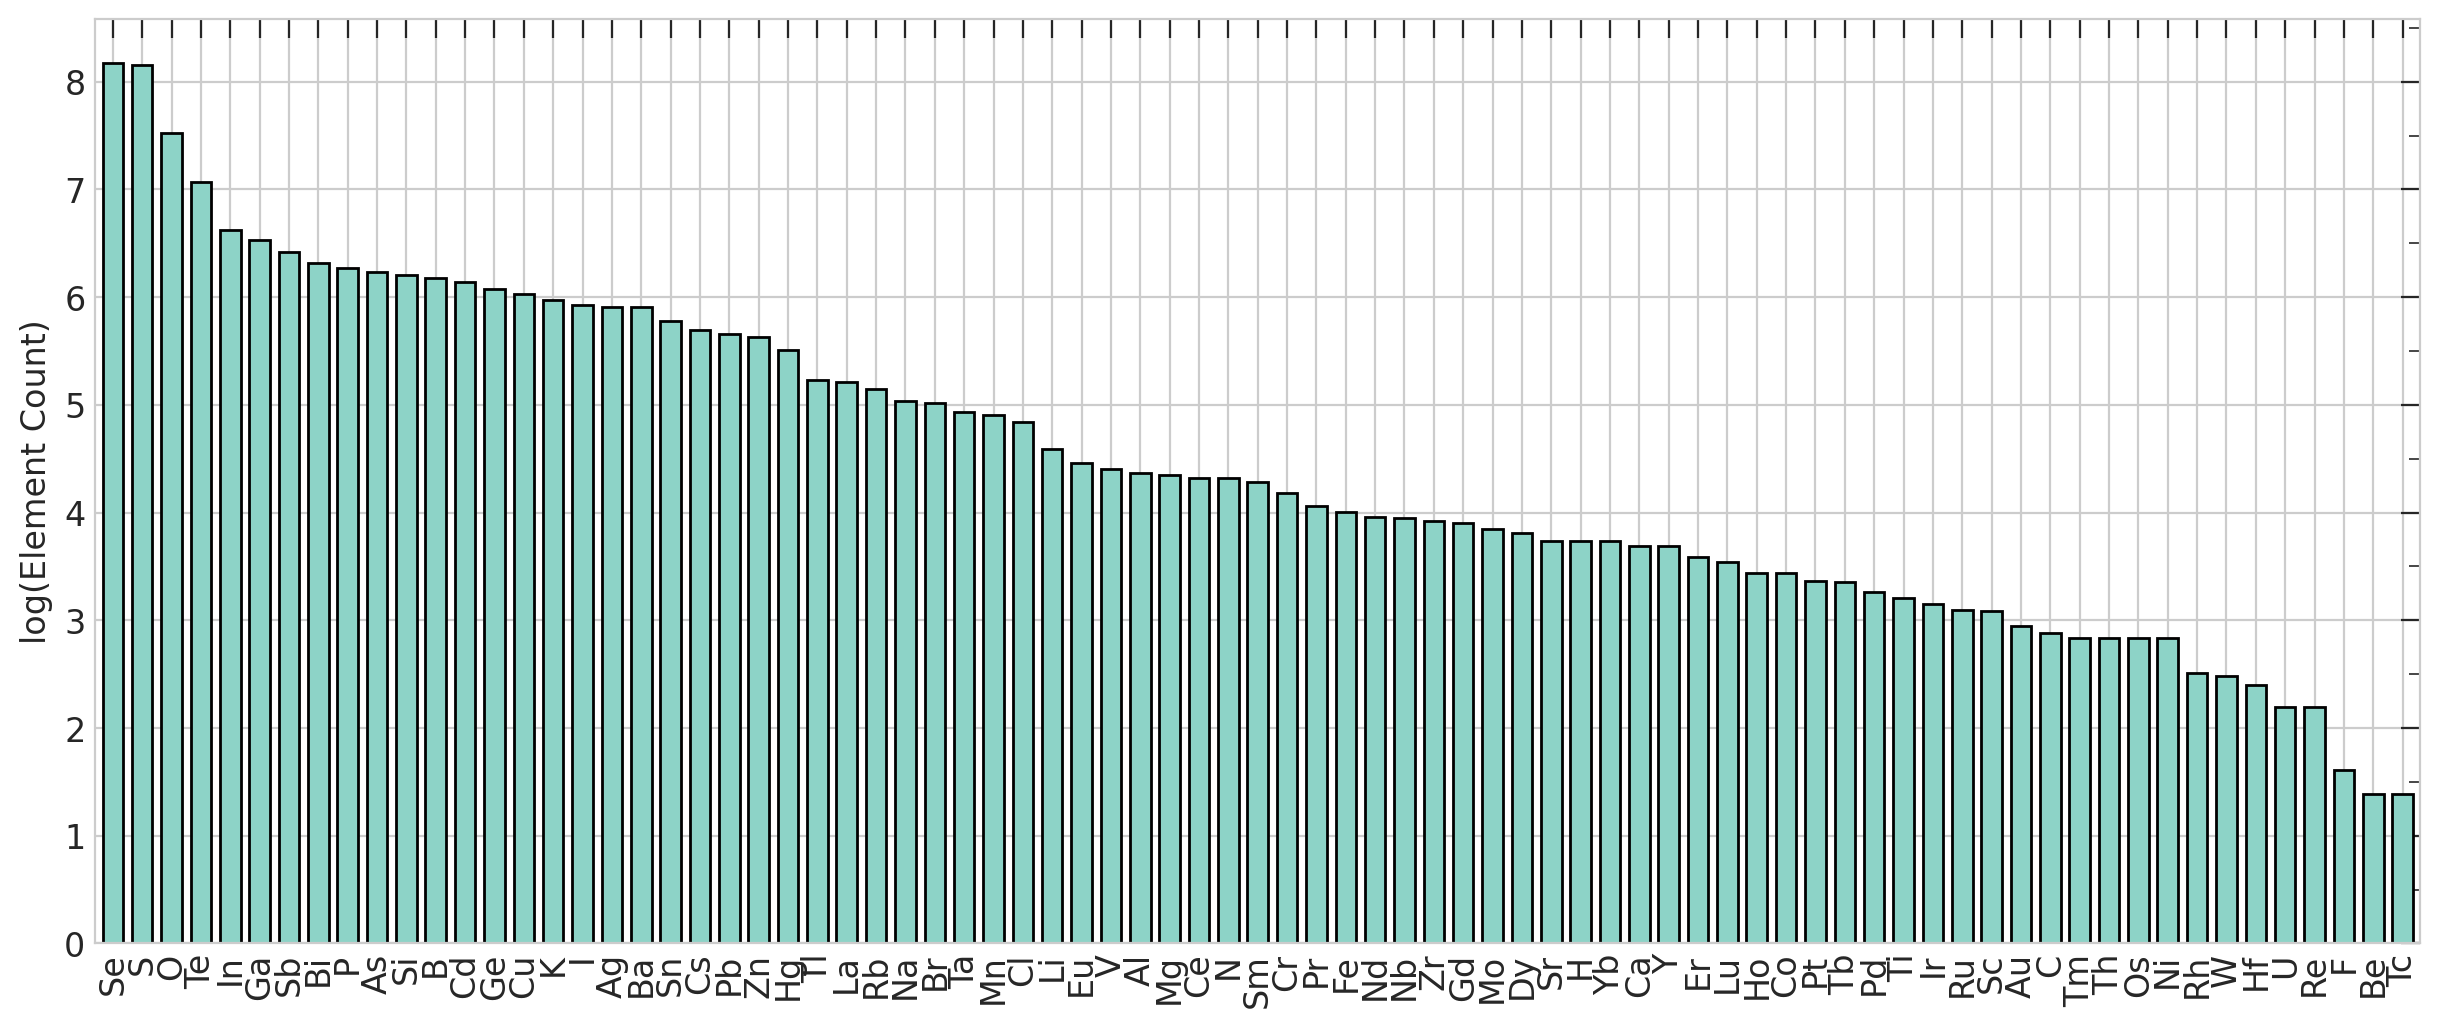

In [30]:
# To import the custom module from a specific path
import sys
sys.path.insert(0, os.path.join(current_dir, '../'))
from Utools.ML_figures.figures import element_prevalence
# Visualizing elemental prevalence in the exp dataset

current_dir = os.getcwd()
os.chdir('./Utools')  # Change to where ML_figures is a direct subdirectory

formula = exp_trans_df.iloc[:, 0]

save_dir = os.path.join(current_dir, './figures/element_prevalence/used_data/exp')
os.makedirs(save_dir, exist_ok=True)
element_prevalence(formula,
                   name='element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=True)

plt.rcParams.update({'font.size': 12})
element_prevalence(formula,
                   name='element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=True)

os.chdir(current_dir)  # Return to previous directory

In [31]:
distribution_save_dir = os.path.join(current_dir, 'figures', 'data_distribution', 'used_data', 'exp')
os.makedirs(distribution_save_dir, exist_ok=True)

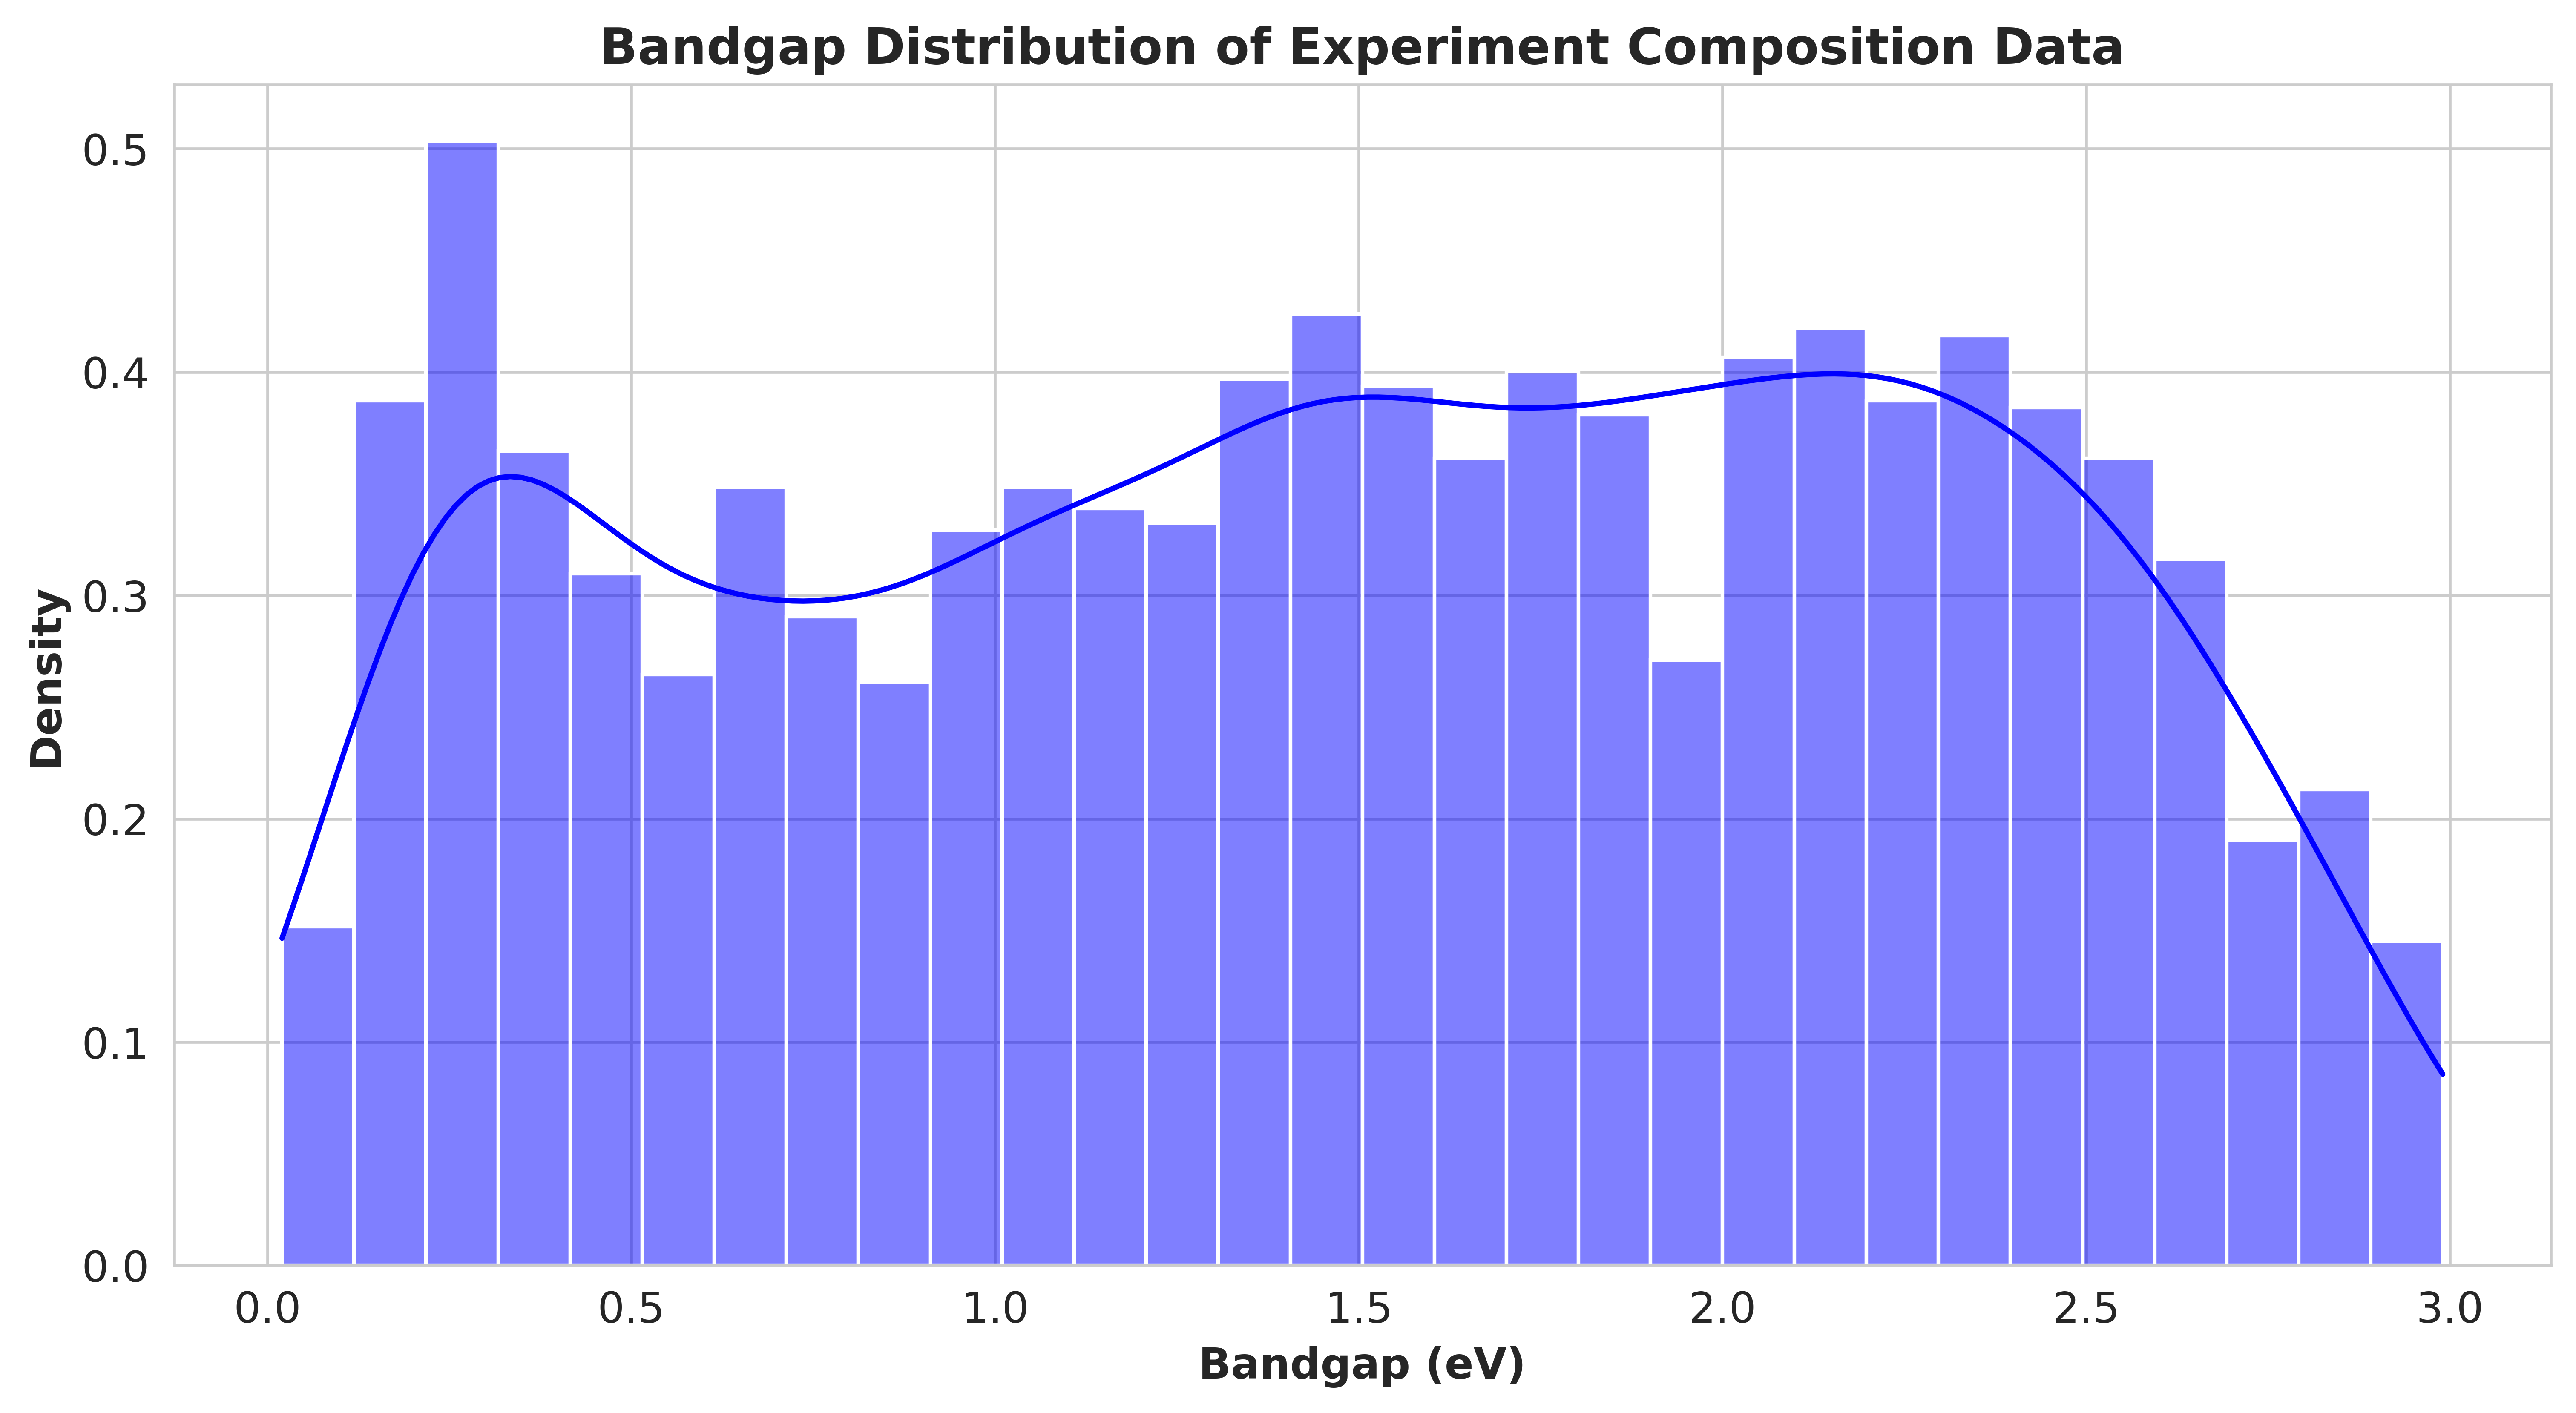

In [32]:
# draw a distribution plot of the bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(exp_trans_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Bandgap Distribution of Experiment Composition Data", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
# Create the directory if it doesn't exist
plt.savefig(os.path.join(distribution_save_dir, 'bandgap_distribution.png'), dpi=300)
plt.show()

In [33]:
# 查看数据中氧化物和非氧化物的带隙分布情况
oxides_df = exp_trans_df[exp_trans_df['composition'].str.contains('O')]
non_oxides_df = exp_trans_df[~exp_trans_df['composition'].str.contains('O')]

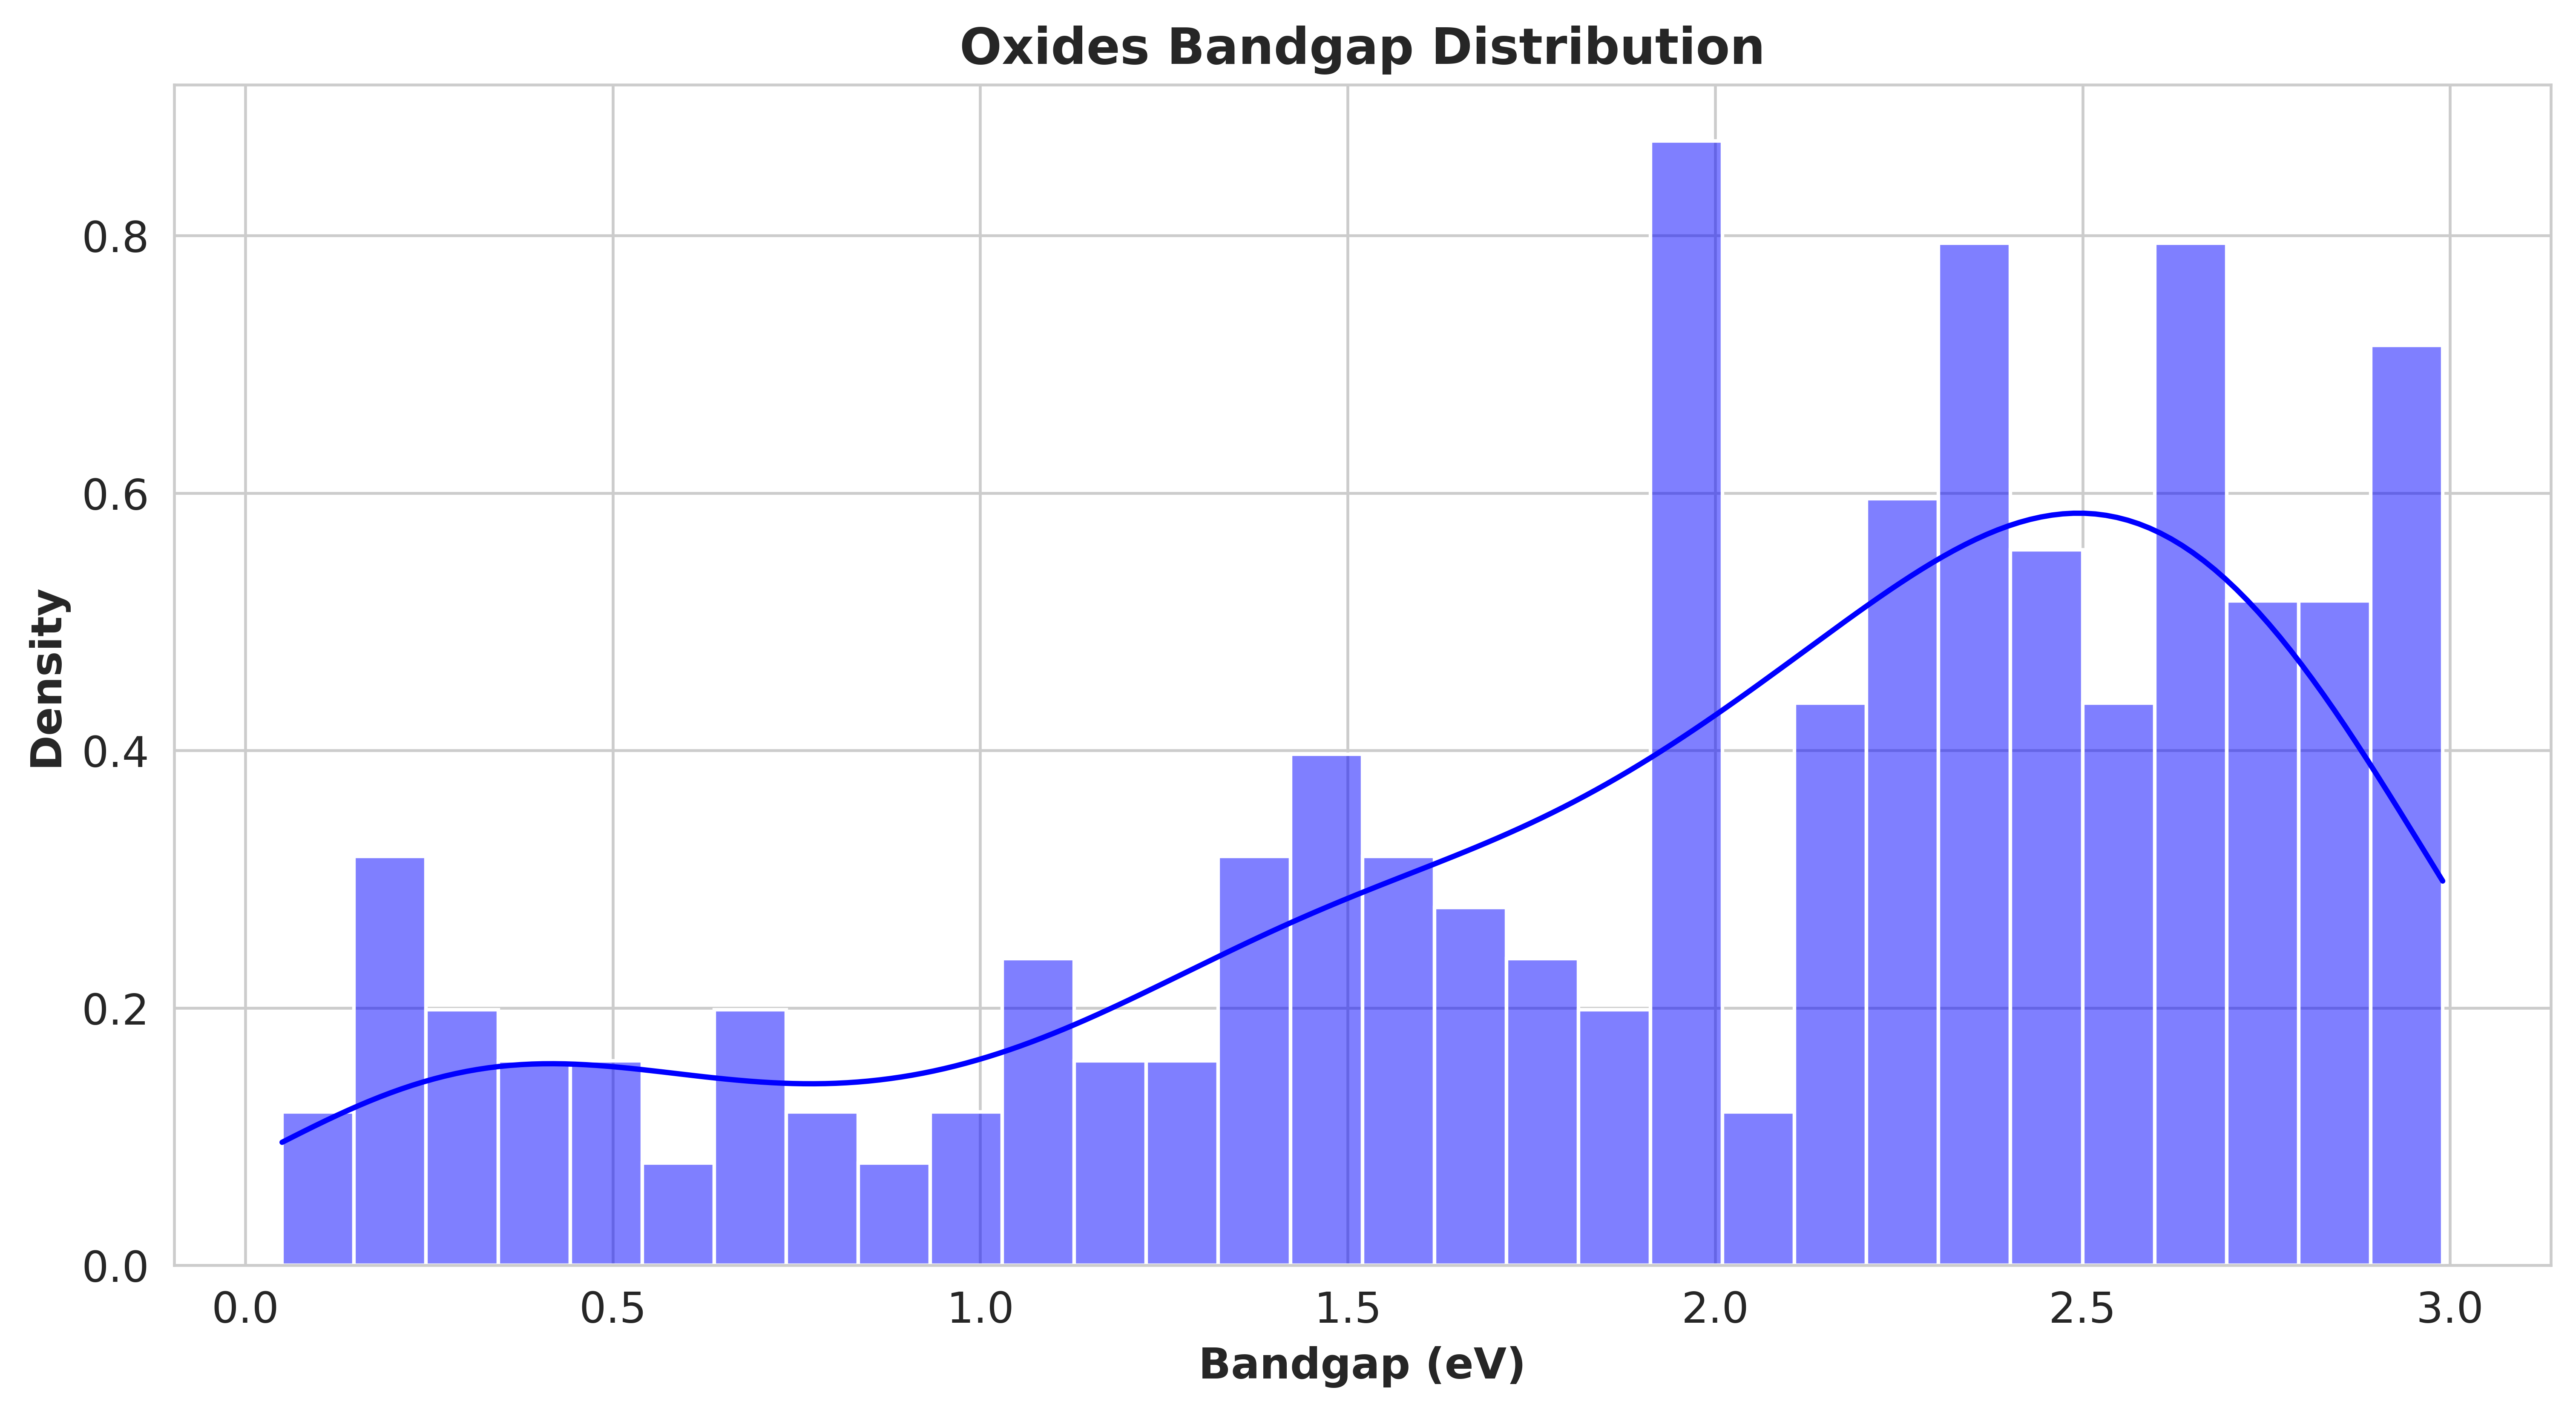

In [34]:
# draw a distribution plot of the oxides bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(oxides_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Oxides Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(distribution_save_dir, 'oxides_bandgap_distribution.png'), dpi=300)
plt.show()

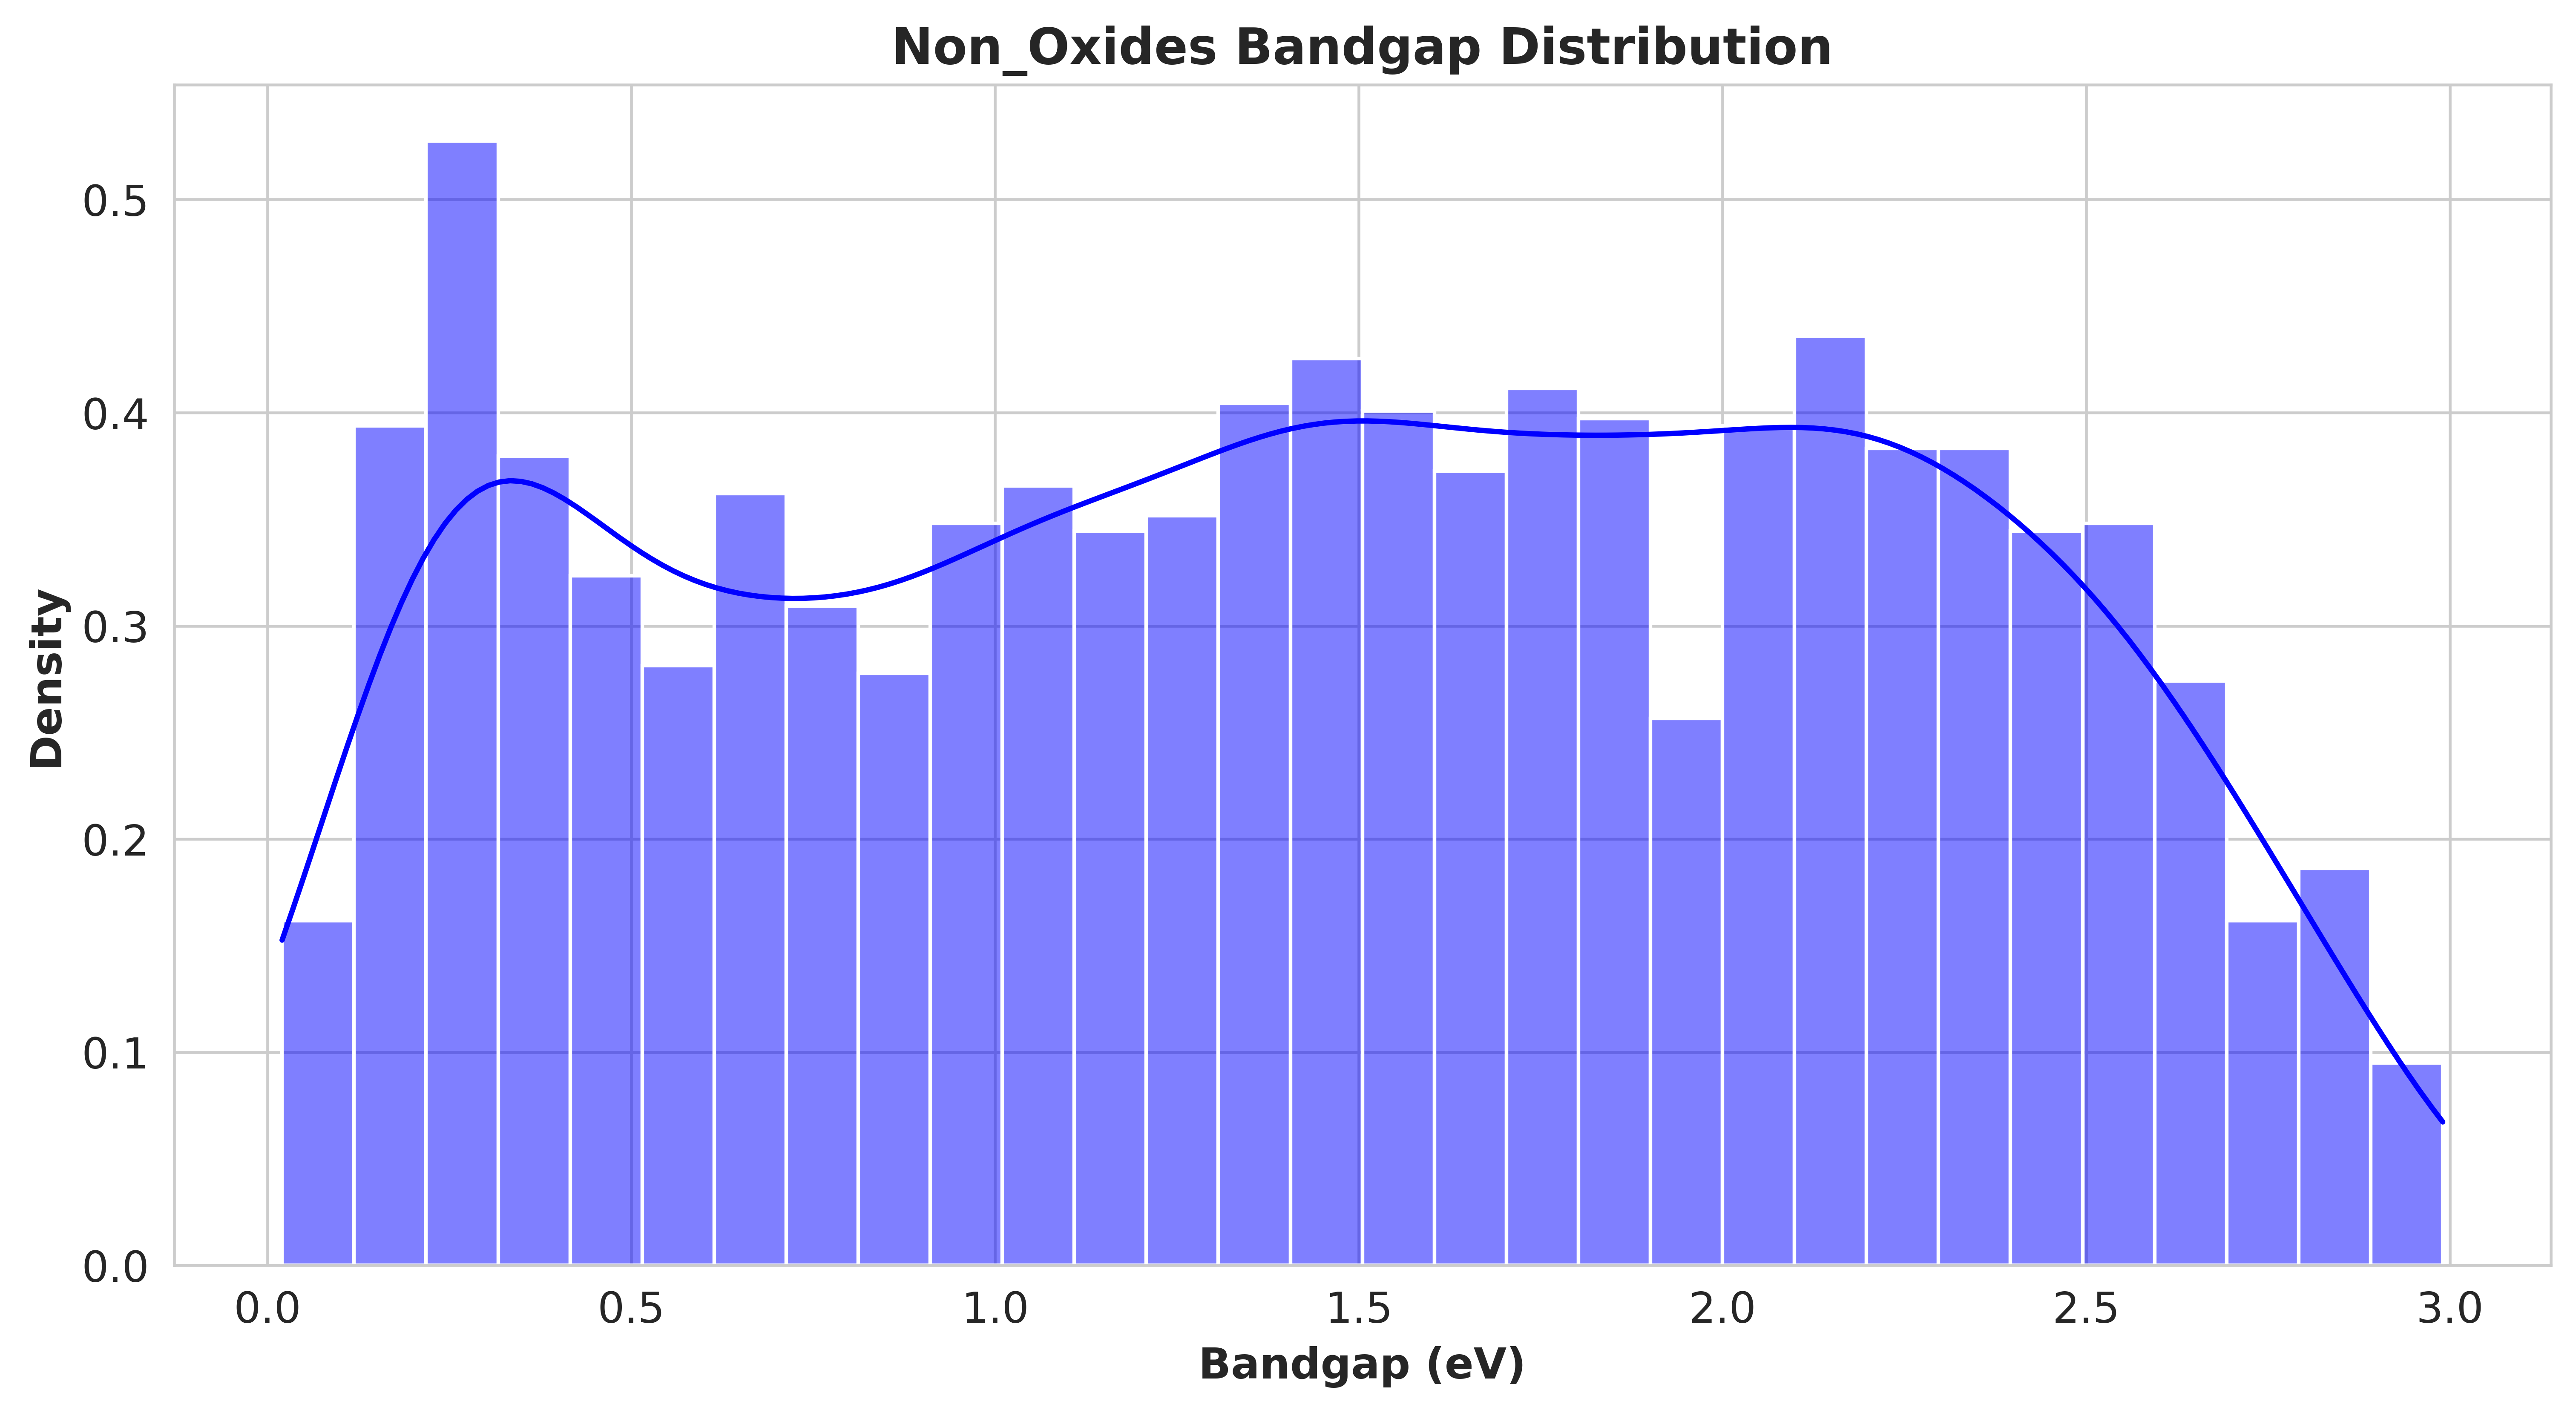

In [35]:
# draw a distribution plot of the non_oxides bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(non_oxides_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Non_Oxides Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(distribution_save_dir, 'non_oxides_bandgap_distribution.png'), dpi=300)
plt.show()